In [196]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [197]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

In [198]:
raw_info

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [199]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price})

In [200]:
house_info

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Size of Basement,Condition,Size of Above,Location,Price
0,3,1.00,1.0,1955,0.0,0.0,3,1180,98178,221900.0
1,3,2.25,2.0,1951,1991.0,400.0,3,2170,98125,538000.0
2,2,1.00,1.0,1933,NaN,0.0,3,770,98028,180000.0
3,4,3.00,1.0,1965,0.0,910.0,5,1050,98136,604000.0
4,3,2.00,1.0,1987,0.0,0.0,3,1680,98074,510000.0
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,2009,0.0,0.0,3,1530,98103,360000.0
21593,4,2.50,2.0,2014,0.0,0.0,3,2310,98146,400000.0
21594,2,0.75,2.0,2009,0.0,0.0,3,1020,98144,402101.0
21595,3,2.50,2.0,2004,0.0,0.0,3,1600,98027,400000.0


In [201]:
house_info.describe()

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Condition,Size of Above,Location,Price
count,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,1.494096,1970.999676,83.636778,3.409825,1788.596842,98077.951845,5.402966e+05
std,0.926299,0.768984,0.539683,29.375234,399.946414,0.650546,827.759761,53.513072,3.673681e+05
min,1.000000,0.500000,1.000000,1900.000000,0.000000,1.000000,370.000000,98001.000000,7.800000e+04
25%,3.000000,1.750000,1.000000,1951.000000,0.000000,3.000000,1190.000000,98033.000000,3.220000e+05
50%,3.000000,2.250000,1.500000,1975.000000,0.000000,3.000000,1560.000000,98065.000000,4.500000e+05
75%,4.000000,2.500000,2.000000,1997.000000,0.000000,4.000000,2210.000000,98118.000000,6.450000e+05
max,33.000000,8.000000,3.500000,2015.000000,2015.000000,5.000000,9410.000000,98199.000000,7.700000e+06


In [202]:
location =raw_info.zipcode

In [203]:
index = []
for i,x in enumerate(raw_info.lat):
    if x == 47.7400:index.append(i)
    if x == 47.7556:index.append(i)
    if x == 47.7542:index.append(i)  
    if x == 47.6739:index.append(i)
    if x == 47.7532:index.append(i)
    if x == 47.7716:index.append(i)    
index

[1710,
 2428,
 2961,
 3271,
 4025,
 5056,
 6510,
 7265,
 8304,
 9285,
 10138,
 11304,
 11559,
 12126,
 13415,
 13542,
 15592,
 16270,
 16426]

In [204]:
for x,i in enumerate(index):print(x,location[i])

0 98133
1 98155
2 98177
3 98115
4 98107
5 98133
6 98155
7 98033
8 98133
9 98103
10 98072
11 98028
12 98072
13 98077
14 98155
15 98133
16 98077
17 98177
18 98072


In [205]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bedrooms"].tolist()

    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_northking = []
    for i in bedrooms_index:
        if locations[i] == 98133 : bedrooms_northking.append(i)
        elif locations[i] == 98155 : bedrooms_northking.append(i)
        elif locations[i] == 98177 : bedrooms_northking.append(i)
        elif locations[i] == 98115 : bedrooms_northking.append(i)
        elif locations[i] == 98107 : bedrooms_northking.append(i)
        elif locations[i] == 98133 : bedrooms_northking.append(i)
        elif locations[i] == 98033 : bedrooms_northking.append(i)
        elif locations[i] == 98133 : bedrooms_northking.append(i)
        elif locations[i] == 98103 : bedrooms_northking.append(i)
        elif locations[i] == 98072: bedrooms_northking.append(i)
        elif locations[i] == 98028 : bedrooms_northking.append(i)
        elif locations[i] == 98072 : bedrooms_northking.append(i)
        elif locations[i] == 98077 : bedrooms_northking.append(i)
        elif locations[i] == 98155 : bedrooms_northking.append(i)
        elif locations[i] == 98133 : bedrooms_northking.append(i)
        elif locations[i] == 98077 : bedrooms_northking.append(i)
        elif locations[i] == 98177 : bedrooms_northking.append(i)
        elif locations[i] == 98072 : bedrooms_northking.append(i)

    price = house_info["Price"].tolist()

    price_northking = []
    for i in bedrooms_northking:price_northking.append(price[i])
    return(price_northking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_northking = []
for i in no_of_bedrooms:
    price_bedrooms_northking.append(PRICE_BEDROOM(i))
price_bedrooms_northking= sum(price_bedrooms_northking, [])
len(price_bedrooms_northking)

3831

In [206]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == 98133 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98155 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98177 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98115 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98107 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98033 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98103 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98072: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98028 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98072 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98077 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98155 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98077 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98177 : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == 98072 : X_value.append(AMOUNT_BEDROOM)
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_northking = []
for i in no_of_bedrooms:
    amount_bedrooms_northking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_northking= sum(amount_bedrooms_northking, [])
len(amount_bedrooms_northking)

3831

In [207]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_northking,
                                'Price':price_bedrooms_northking})
regressiondata1 = regressiondata1.drop(3830)
regressiondata1

,Amount_of_Bedrooms,Price
0,3,310000.0
1,3,438000.0
2,3,696000.0
3,3,450000.0
4,3,549000.0
...,...,...
3825,7,450000.0
3826,7,540000.0
3827,8,340000.0
3828,8,900000.0


<ipython-input-208-7996f817a6d6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])


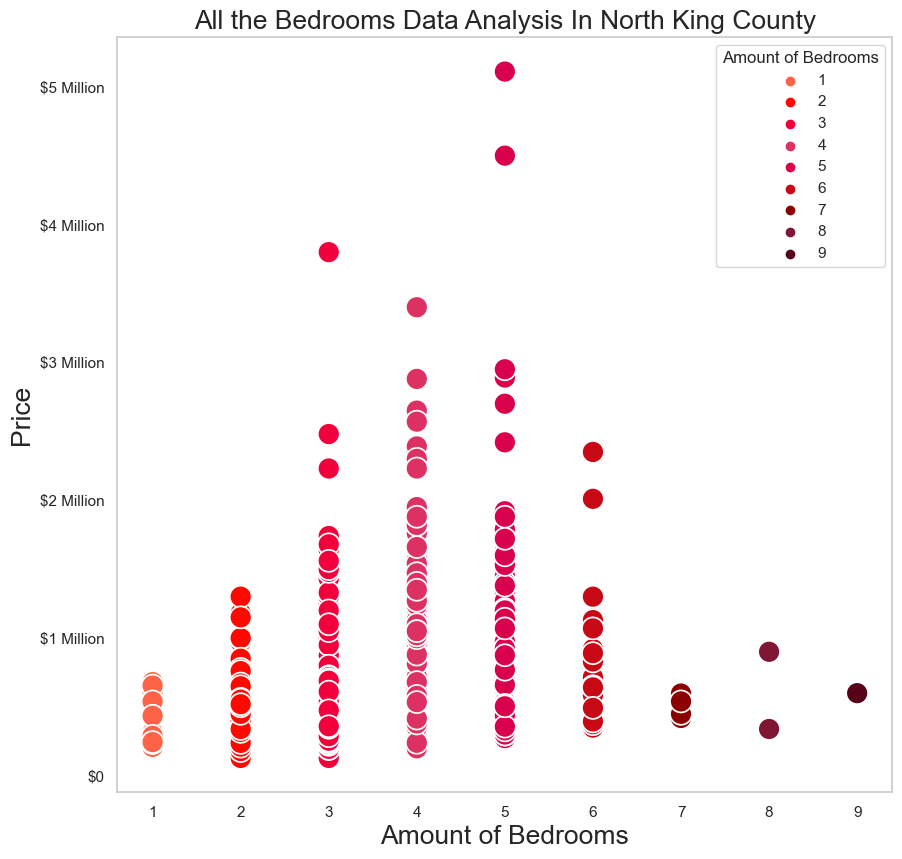

In [208]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ['#FF6347','#FF0800','#f2003c','#DE3163','#d9004c','#c80815','#8b0000','#7f1734','#560319']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In North King County',size=19)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])
plt.show()

In [209]:
train_df, test_df = train_test_split(regressiondata1, test_size=0.10, shuffle=False)

In [210]:
X_train, y_train = train_df[['Amount_of_Bedrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bedrooms']], test_df[['Price']]

In [211]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [212]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': X_test.reset_index()['Amount_of_Bedrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [213]:
Quantile_regression

,Amount_of_Bedrooms,0.1,0.5,0.9,Price
0,2,272048.942197,423627.002065,6.025586e+05,548000.0
1,2,272048.942197,423627.002065,6.025586e+05,462550.0
2,2,272048.942197,423627.002065,6.025586e+05,250000.0
3,2,272048.942197,423627.002065,6.025586e+05,306000.0
4,2,272048.942197,423627.002065,6.025586e+05,525000.0
...,...,...,...,...,...
378,7,394998.140702,604997.184492,1.000995e+06,450000.0
379,7,394998.140702,604997.184492,1.000995e+06,540000.0
380,8,394998.140702,604997.184492,1.000995e+06,340000.0
381,8,394998.140702,604997.184492,1.000995e+06,900000.0


In [214]:
melted_data = pd.melt(Quantile_regression, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(1149,1532))

In [215]:
melted_data

,Amount_of_Bedrooms,variable,value
0,2,0.1,2.720489e+05
1,2,0.1,2.720489e+05
2,2,0.1,2.720489e+05
3,2,0.1,2.720489e+05
4,2,0.1,2.720489e+05
...,...,...,...
1144,7,0.9,1.000995e+06
1145,7,0.9,1.000995e+06
1146,8,0.9,1.000995e+06
1147,8,0.9,1.000995e+06


In [216]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bedrooms':[1,2,3,4,5,6,7,8,9],
    '0.1':[272048.942197,272048.942197,272048.942197,394998.140702,394998.140702,394998.140702,
          394998.140702,394998.140702,394998.140702],
'0.5':[423627.002065,423627.002065,423627.002065,604997.184492,604997.184492,604997.184492,604997.184492,
      604997.184492	,604997.184492],
'0.9':[6.025586e+05,6.025586e+05,6.025586e+05,1.000995e+06,1.000995e+06,1.000995e+06,1.000995e+06,
      1.000995e+06,1.000995e+06]})
Quantileregression_updated

,Amount_of_Bedrooms,0.1,0.5,0.9
0,1,272048.942197,423627.002065,602558.6
1,2,272048.942197,423627.002065,602558.6
2,3,272048.942197,423627.002065,602558.6
3,4,394998.140702,604997.184492,1000995.0
4,5,394998.140702,604997.184492,1000995.0
5,6,394998.140702,604997.184492,1000995.0
6,7,394998.140702,604997.184492,1000995.0
7,8,394998.140702,604997.184492,1000995.0
8,9,394998.140702,604997.184492,1000995.0


In [217]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Bedrooms,Percentile,value
0,1,0.1,2.720489e+05
1,2,0.1,2.720489e+05
2,3,0.1,2.720489e+05
3,4,0.1,3.949981e+05
4,5,0.1,3.949981e+05
5,6,0.1,3.949981e+05
6,7,0.1,3.949981e+05
7,8,0.1,3.949981e+05
8,9,0.1,3.949981e+05
9,1,0.5,4.236270e+05


<ipython-input-218-812472b4c17c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000', '$800,000',


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1100000.0, '')]

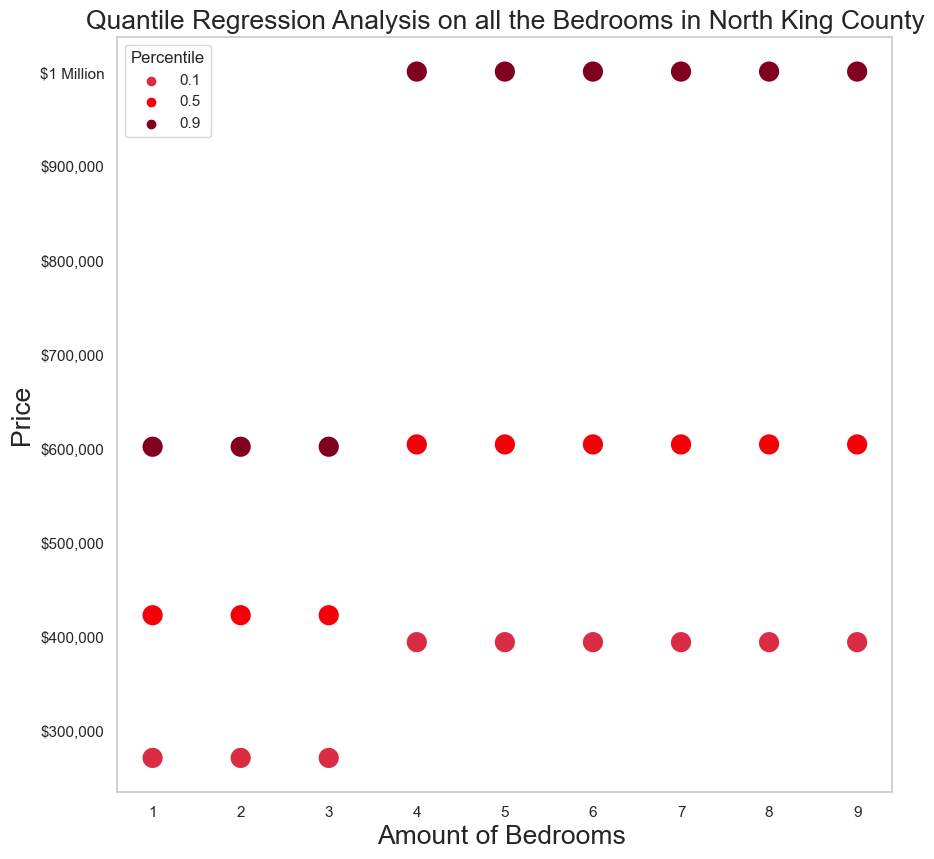

In [218]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax = sns.scatterplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis on all the Bedrooms in North King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000', '$800,000',
                 '$900,000','$1 Million'])

<ipython-input-219-2afeaeea88c2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000', '$800,000',


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1100000.0, '')]

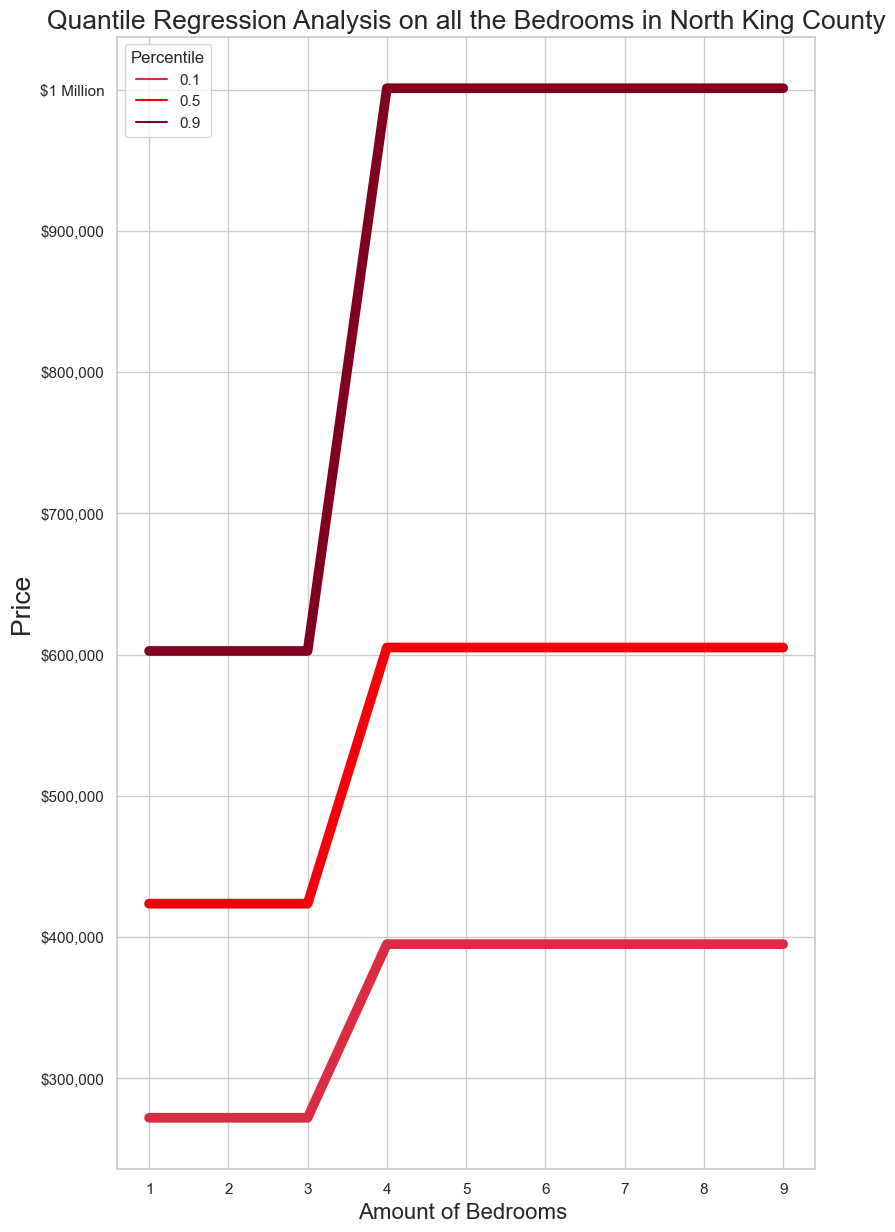

In [219]:
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bedrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bedrooms in North King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000', '$800,000',
                 '$900,000','$1 Million'])

In [220]:
(Quantile_regression['Price'] > Quantile_regression['0.1']).value_counts()

True     348
False     35
dtype: int64

In [221]:
i = 0
y= 0
x = []
while i < 348:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 35:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

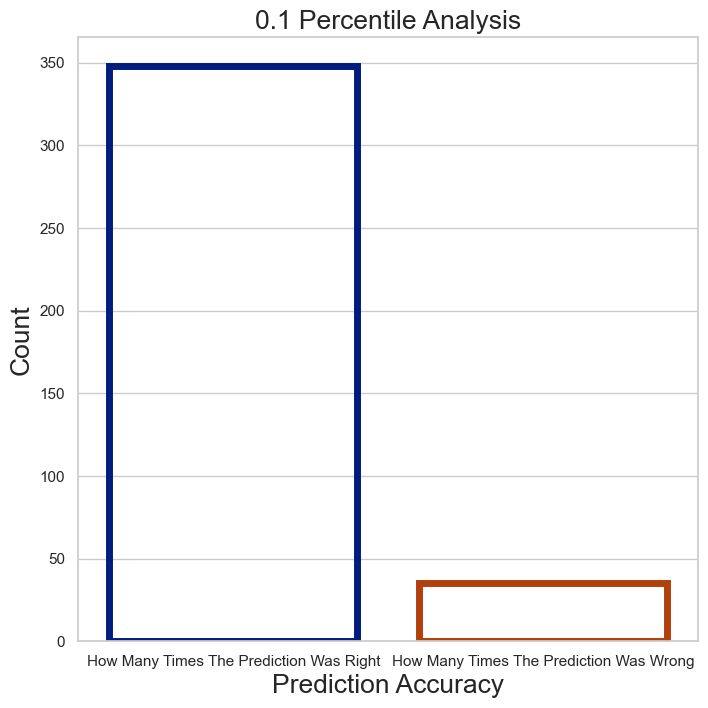

In [222]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [223]:
(Quantile_regression['Price'] > Quantile_regression['0.5']).value_counts()

True     213
False    170
dtype: int64

In [224]:
i = 0
y= 0
x = []
while i < 213:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 170:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df32 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

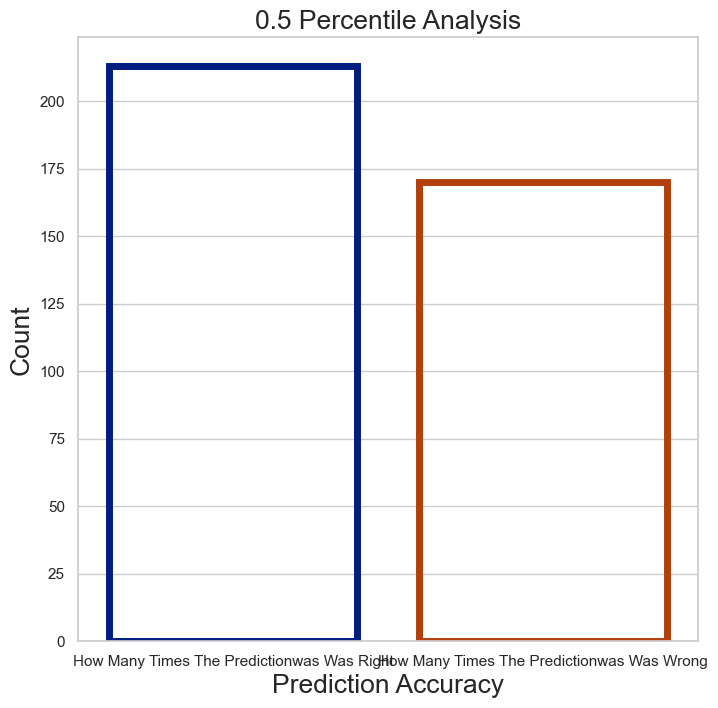

In [225]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df32,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [226]:
(Quantile_regression['Price'] > Quantile_regression['0.9']).value_counts()

False    315
True      68
dtype: int64

In [227]:
i = 0
y= 0
x = []
while i < 315:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 68:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df33 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

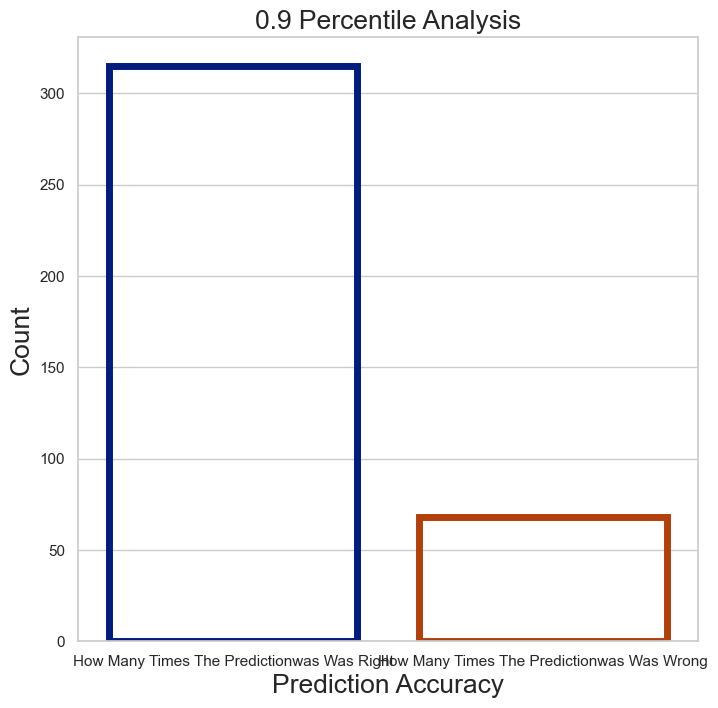

In [228]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df33,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [229]:
Predictions = []
for i in regressiondata1.Amount_of_Bedrooms:
    if i == 1:Predictions.append('Between: $272,048 - $602,558')
    if i == 2: Predictions.append('Between: $272,048 - $602,558')
    if i == 3:Predictions.append('Between: $272,048 - $602,558')
    if i == 4:Predictions.append('Between: $394,998 - $1,000,995') 
    if i == 5:Predictions.append('Between: $394,998 - $1,000,995')
    if i == 6:Predictions.append('Between: $394,998 - $1,000,995')
    if i == 7:Predictions.append('Between: $394,998 - $1,000,995')
    if i == 8:Predictions.append('Between: $394,998 - $1,000,995')
    if i == 9:Predictions.append('Between: $394,998 - $1,000,995')
len(Predictions)

3830

In [230]:
price = []
for i in regressiondata1.Price:
    price.append("${:,.0f}".format(i))

In [231]:
Prediction = pd.DataFrame({'Amount of Bedrooms':regressiondata1.Amount_of_Bedrooms,
                           'Prediction':Predictions,'Actual Price':price})
Prediction

,Amount of Bedrooms,Prediction,Actual Price
0,3,"Between: $272,048 - $602,558","$310,000"
1,3,"Between: $272,048 - $602,558","$438,000"
2,3,"Between: $272,048 - $602,558","$696,000"
3,3,"Between: $272,048 - $602,558","$450,000"
4,3,"Between: $272,048 - $602,558","$549,000"
...,...,...,...
3825,7,"Between: $394,998 - $1,000,995","$450,000"
3826,7,"Between: $394,998 - $1,000,995","$540,000"
3827,8,"Between: $394,998 - $1,000,995","$340,000"
3828,8,"Between: $394,998 - $1,000,995","$900,000"


In [232]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()

    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == 98133 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98155 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98177 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98115 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98107 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98033 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98103 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98072: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98028 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98072 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98077 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98155 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98133 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98077 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98177 : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == 98072 : X_value.append(AMOUNT_BATHROOM)
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_northking = []
for i in no_of_bathrooms:
    amount_bathrooms_northking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_northking= sum(amount_bathrooms_northking, [])
len(amount_bathrooms_northking)

3831

In [233]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()

    amount_bath = house_info["Bathrooms"].tolist()

    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_northking = []
    for i in bathroom_index:
        if locations[i] ==   98133 : bathroom_northking.append(i)
        elif locations[i] == 98155 : bathroom_northking.append(i)
        elif locations[i] == 98177 : bathroom_northking.append(i)
        elif locations[i] == 98115 : bathroom_northking.append(i)
        elif locations[i] == 98107 : bathroom_northking.append(i)
        elif locations[i] == 98133 : bathroom_northking.append(i)
        elif locations[i] == 98033 : bathroom_northking.append(i)
        elif locations[i] == 98133 : bathroom_northking.append(i)
        elif locations[i] == 98103: bathroom_northking.append(i)
        elif locations[i] == 98072 : bathroom_northking.append(i)
        elif locations[i] == 98028 : bathroom_northking.append(i)
        elif locations[i] == 98072 : bathroom_northking.append(i)
        elif locations[i] == 98077 : bathroom_northking.append(i)
        elif locations[i] == 98155 : bathroom_northking.append(i)
        elif locations[i] == 98133 : bathroom_northking.append(i)
        elif locations[i] == 98077 : bathroom_northking.append(i)
        elif locations[i] == 98177 : bathroom_northking.append(i)
        elif locations[i] == 98072 : bathroom_northking.append(i)
    price = house_info["Price"].tolist()

    price_northking = []
    for i in bathroom_northking:price_northking.append(price[i])
    return(price_northking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_northking = []
for i in no_of_bathrooms:
    price_bathroom_northking.append(PRICE_BATHROOM(i))
price_bathroom_northking = sum(price_bathroom_northking, [])
price_bathroom_northking

[696000.0,
 680000.0,
 660000.0,
 921500.0,
 917500.0,
 400000.0,
 274975.0,
 604950.0,
 632925.0,
 1000000.0,
 551000.0,
 496500.0,
 1200000.0,
 750000.0,
 880000.0,
 530000.0,
 340000.0,
 650000.0,
 475000.0,
 435000.0,
 449950.0,
 760000.0,
 480000.0,
 660000.0,
 800000.0,
 990000.0,
 720000.0,
 630000.0,
 535000.0,
 585000.0,
 1130000.0,
 510000.0,
 425000.0,
 565000.0,
 392400.0,
 365000.0,
 340000.0,
 748000.0,
 847000.0,
 537250.0,
 605000.0,
 1080000.0,
 503000.0,
 519900.0,
 706000.0,
 1180000.0,
 495000.0,
 1100000.0,
 828500.0,
 550000.0,
 467000.0,
 576000.0,
 825000.0,
 520500.0,
 442500.0,
 535000.0,
 805000.0,
 883000.0,
 480000.0,
 824500.0,
 439500.0,
 475000.0,
 830000.0,
 475000.0,
 670950.0,
 765000.0,
 760000.0,
 426000.0,
 509950.0,
 775000.0,
 522250.0,
 665000.0,
 446500.0,
 459000.0,
 625000.0,
 355950.0,
 409900.0,
 674250.0,
 543000.0,
 475000.0,
 552500.0,
 715000.0,
 420000.0,
 980000.0,
 687000.0,
 779000.0,
 579000.0,
 549950.0,
 503000.0,
 685000.0,
 353

In [234]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_northking,
                                'Price':price_bathroom_northking})
regressiondata2.Amount_of_Bathrooms.value_counts()
#regressiondata2

1.00    861
2.50    721
1.75    569
2.25    362
2.00    358
1.50    316
2.75    188
3.00    144
3.25    108
3.50    102
3.75     31
4.00     23
4.50     15
4.25     11
0.75      9
4.75      5
5.00      2
5.75      2
6.25      1
5.50      1
5.25      1
0.50      1
Name: Amount_of_Bathrooms, dtype: int64

<ipython-input-235-132c62a4c0b1>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','0','$1 Million','$2 Million','$3 Million','$4 Million',


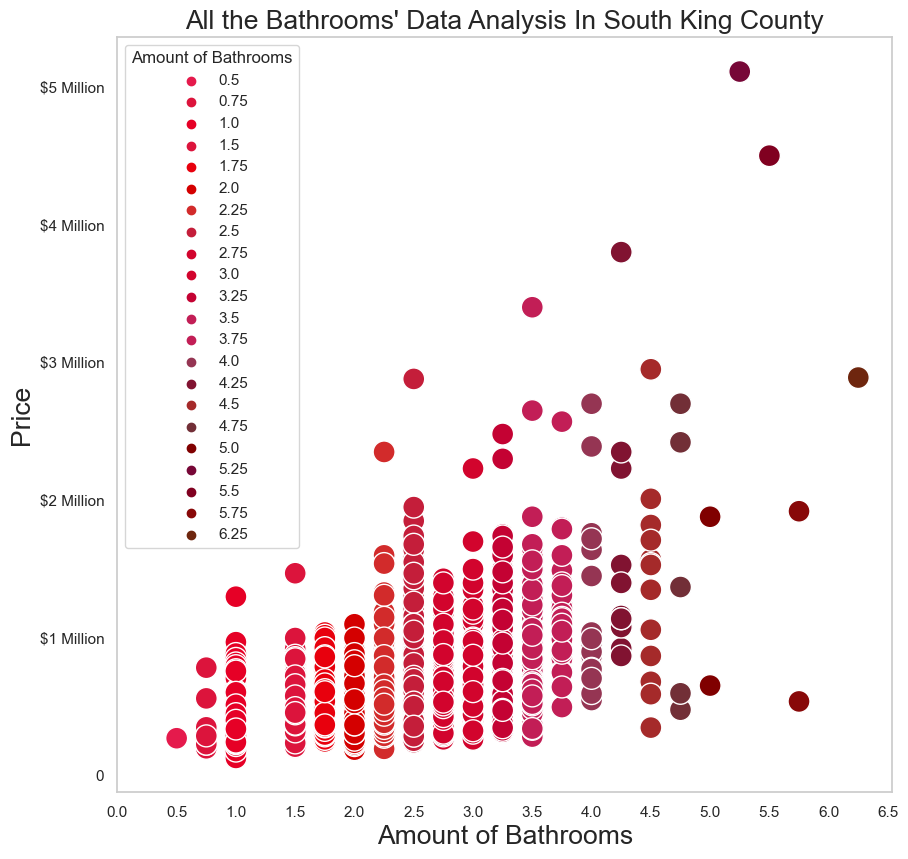

In [235]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = ['#e51a4c','#dc143c','#e60026','#DC143C','#e8000d',
          '#d40000','#D22B2B','#C41E3A','#D2042D','#D2042D',
          '#c40233','#C21E56','#C21E56','#953553','#811331','#A52A2A',
          '#722F37','#800000', '#770737','#800020',
          '#880808','#6E260E']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In South King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','0','$1 Million','$2 Million','$3 Million','$4 Million',
                         '$5 Million'])
plt.xticks(np.arange(0,7,0.5))
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [236]:
train_df, test_df = train_test_split(regressiondata2, test_size=0.10, shuffle=False)

In [237]:
X_train, y_train = train_df[['Amount_of_Bathrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bathrooms']], test_df[['Price']]

In [239]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [240]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': X_test.reset_index()['Amount_of_Bathrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [241]:
Quantile_regression1

,Amount_of_Bathrooms,0.1,0.5,0.9,Price
0,3.00,398997.993200,669448.442874,969994.910420,910000.0
1,3.00,398997.993200,669448.442874,969994.910420,605000.0
2,3.00,398997.993200,669448.442874,969994.910420,546000.0
3,3.00,398997.993200,669448.442874,969994.910420,570000.0
4,3.00,398997.993200,669448.442874,969994.910420,869000.0
...,...,...,...,...,...
379,5.50,398997.993200,669448.442874,969994.910420,4500000.0
380,5.75,398997.993200,669448.442874,969994.910420,540000.0
381,5.75,398997.993200,669448.442874,969994.910420,1920000.0
382,0.50,275001.195263,395002.390526,594904.895153,273000.0


In [242]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bathrooms':[0.50,0.25,0.75,1.0,1.25,1.5,1.75,2.0,
                                                                  2.5,2.25,2.75,3.0,3.25,3.5,3.75,4.0,
                                                                  4.25,4.5,4.75,5.0,5.25,5.5,5.75,
                                                                  6.0,6.25],
    '0.1':[275001.195263,275001.195263,275001.195263,275001.195263,275001.195263,275001.195263,
           275001.195263,275001.195263,275001.195263,275001.195263,275001.195263,
          398997.993200,398997.993200,398997.993200,398997.993200,398997.993200,398997.993200,
          398997.993200,398997.993200,398997.993200,398997.993200,398997.993200,398997.993200,
          398997.993200,398997.993200],
 '0.5':[395002.390526,395002.390526,395002.390526,395002.390526,395002.390526,395002.390526,
          395002.390526,395002.390526,395002.390526,395002.390526,395002.390526,
    669448.442874,669448.442874,669448.442874,669448.442874,669448.442874,669448.442874,669448.442874,
    669448.442874,669448.442874,669448.442874,669448.442874,669448.442874,669448.442874,669448.442874 ],
   '0.9':[594904.895153,594904.895153,594904.895153,594904.895153,594904.895153,594904.895153,
         594904.895153,594904.895153,594904.895153,594904.895153,594904.895153,
969994.910420,969994.910420,969994.910420,969994.910420,969994.910420,969994.910420,969994.910420,
 969994.910420,969994.910420,969994.910420,969994.910420,969994.910420,969994.910420,
          969994.910420 ]})
Quantileregression_updated

,Amount_of_Bathrooms,0.1,0.5,0.9
0,0.50,275001.195263,395002.390526,594904.895153
1,0.25,275001.195263,395002.390526,594904.895153
2,0.75,275001.195263,395002.390526,594904.895153
3,1.00,275001.195263,395002.390526,594904.895153
4,1.25,275001.195263,395002.390526,594904.895153
5,1.50,275001.195263,395002.390526,594904.895153
6,1.75,275001.195263,395002.390526,594904.895153
7,2.00,275001.195263,395002.390526,594904.895153
8,2.50,275001.195263,395002.390526,594904.895153
9,2.25,275001.195263,395002.390526,594904.895153


In [243]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bathrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Bathrooms,Percentile,value
0,0.50,0.1,275001.195263
1,0.25,0.1,275001.195263
2,0.75,0.1,275001.195263
3,1.00,0.1,275001.195263
4,1.25,0.1,275001.195263
...,...,...,...
70,5.25,0.9,969994.910420
71,5.50,0.9,969994.910420
72,5.75,0.9,969994.910420
73,6.00,0.9,969994.910420


<ipython-input-244-b36e6d3820db>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000',


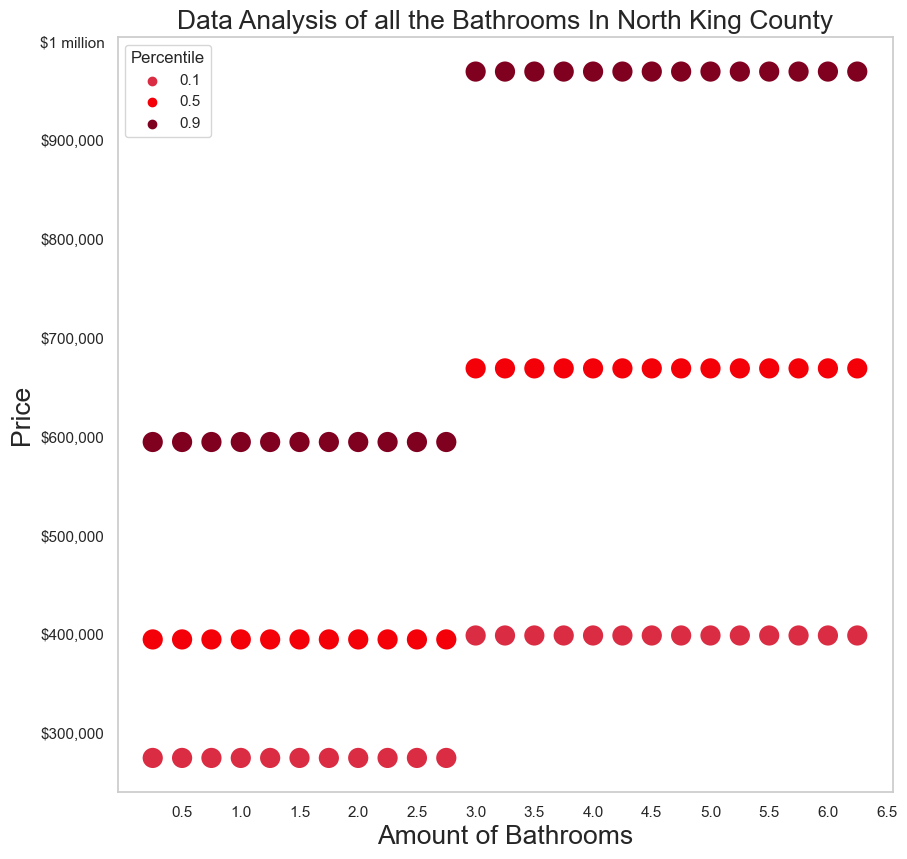

In [244]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Bathrooms",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.xticks(np.arange(0.5,7,0.5))       
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Bathrooms In North King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000',
                   '$700,000', '$800,000','$900,000','$1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((10,10))

<ipython-input-245-ce37a17354ec>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000',


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 million'),
 Text(0, 1100000.0, '')]

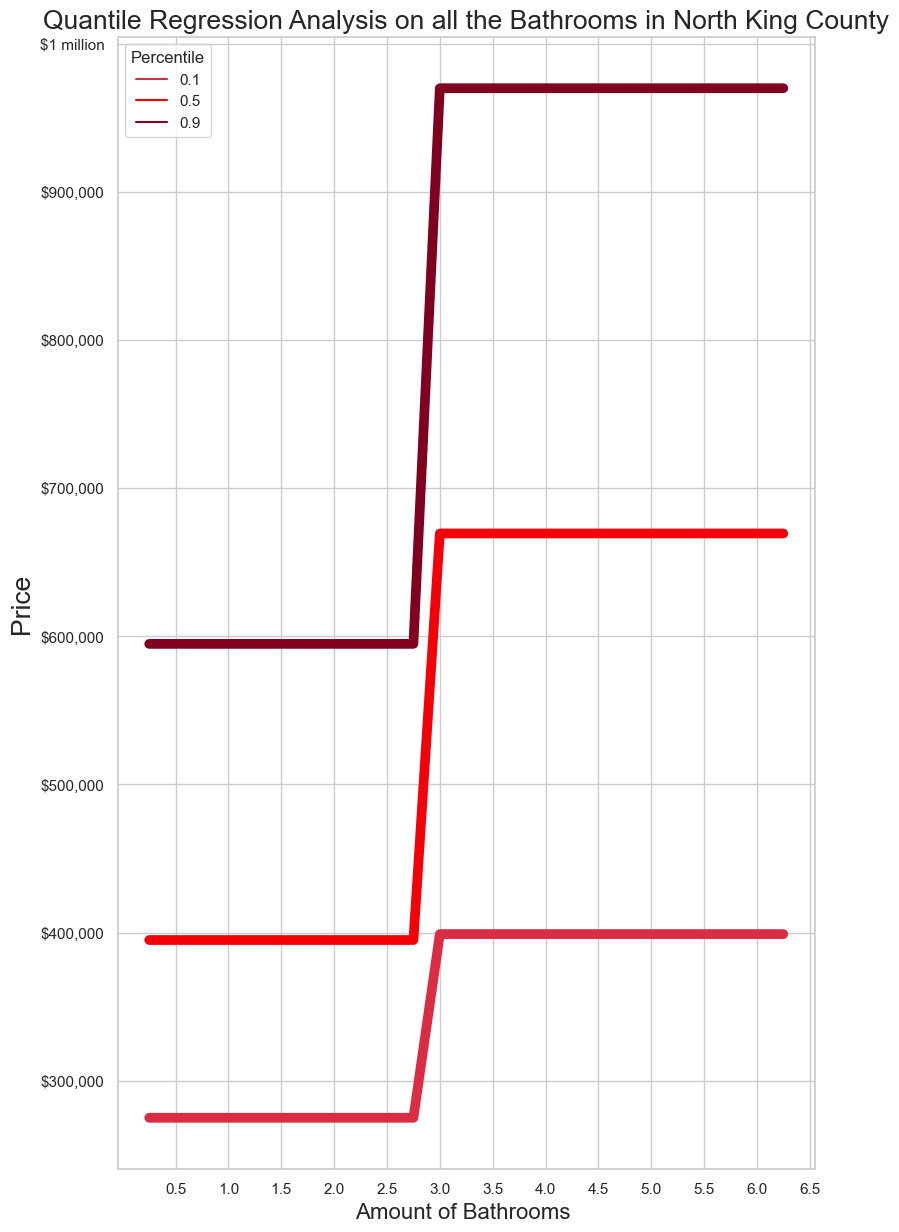

In [245]:
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bathrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.xticks(np.arange(0.5,7,0.5))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bathrooms in North King County',size=19)
plt.xlabel("Amount of Bathrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000',
                   '$700,000', '$800,000','$900,000','$1 million'])

In [246]:
(Quantile_regression1['Price'] > Quantile_regression1['0.1']).value_counts()

True     359
False     25
dtype: int64

In [247]:
i = 0
y= 0
x = []
while i < 359:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 25:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

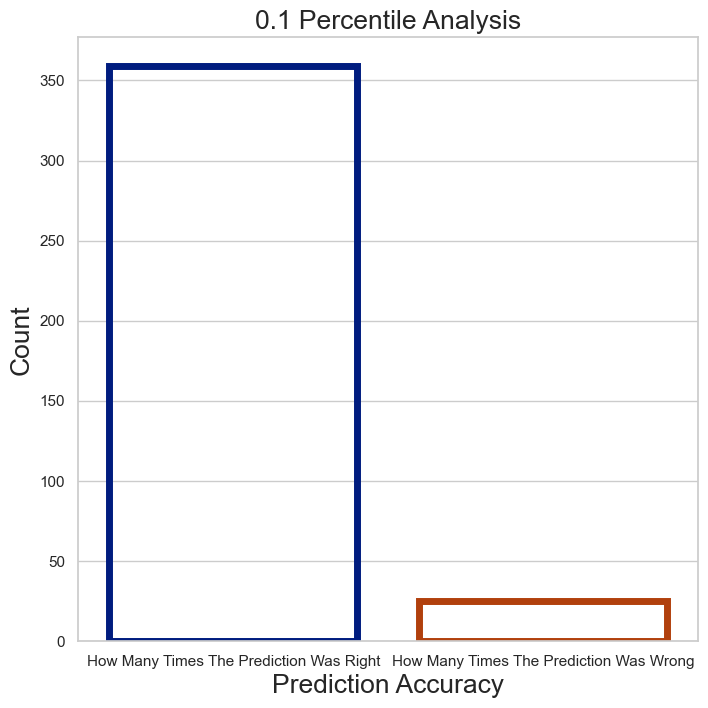

In [248]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [249]:
(Quantile_regression1['Price'] > Quantile_regression1['0.5']).value_counts()

True     248
False    136
dtype: int64

In [250]:
i = 0
y= 0
x = []
while i < 248:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 136:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

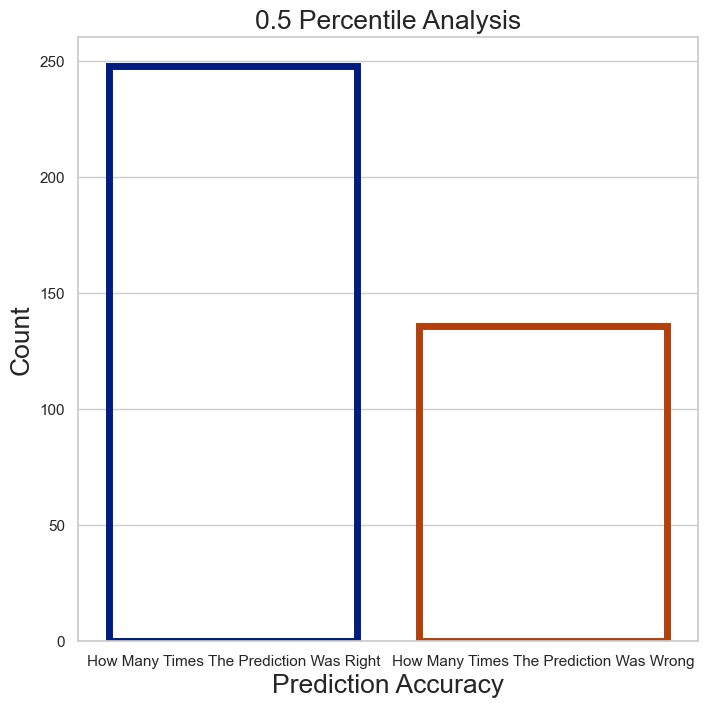

In [251]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [252]:
(Quantile_regression1['Price'] > Quantile_regression1['0.9']).value_counts()

False    239
True     145
dtype: int64

In [253]:
i = 0
y= 0
x = []
while i < 239:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 145:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

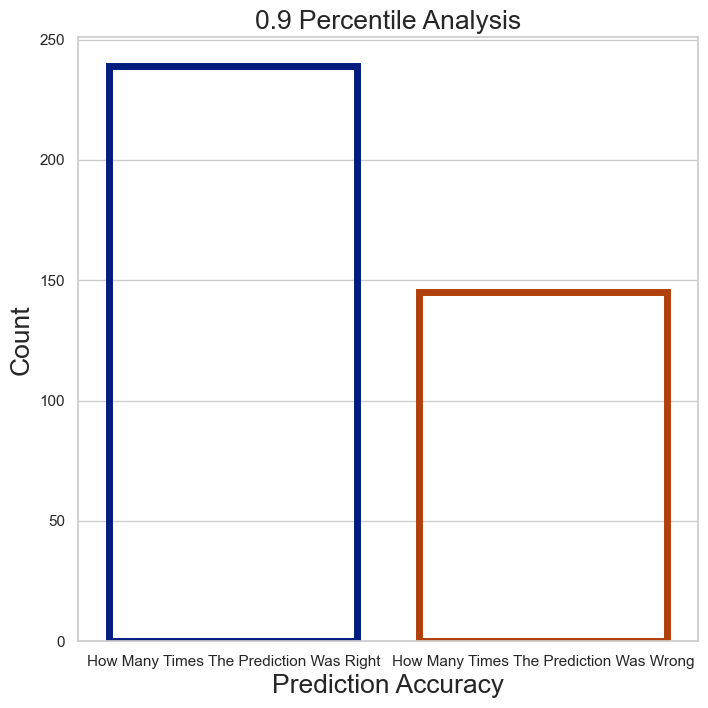

In [254]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [255]:
Predictions1 = []
for i in regressiondata2.Amount_of_Bathrooms:
    if i == 0.5:Predictions1.append('Between: $275,001 - $594,904')
    if i == 0.25:Predictions1.append('Between: $275,001 - $594,904')
    if i == 0.75: Predictions1.append('Between: $275,001 - $594,904')
    if i == 1.0:Predictions1.append('Between: $275,001 - $594,904')
    if i == 1.25:Predictions1.append('Between: $275,001 - $594,904')
    if i == 1.5:Predictions1.append('Between: $275,001 - $594,904') 
    if i == 1.75:Predictions1.append('Between: $275,001 - $594,904')
    if i == 2.0:Predictions1.append('Between: $275,001 - $594,904')
    if i == 2.25:Predictions1.append('Between: $275,001 - $594,904')
    if i == 2.5:Predictions1.append('Between: $275,001 - $594,904') 
    if i == 2.75:Predictions1.append('Between: $275,001 - $594,904')
    if i == 3.0: Predictions1.append('Between: $398,997 - $969,994')
    if i == 3.25:Predictions1.append('Between: $398,997 - $969,994')
    if i == 3.5:Predictions1.append('Between: $398,997 - $969,994') 
    if i == 3.75:Predictions1.append('Between: $398,997 - $969,994')
    if i == 4.0:Predictions1.append('Between: $398,997 - $969,994')
    if i == 4.25:Predictions1.append('Between: $398,997 - $969,994')
    if i == 4.5:Predictions1.append('Between: $398,997 - $969,994')
    if i == 4.75: Predictions1.append('Between: $398,997 - $969,994')
    if i == 5.0:Predictions1.append('Between: $398,997 - $969,994')
    if i == 5.25:Predictions1.append('Between: $398,997 - $969,994') 
    if i == 5.5:Predictions1.append('Between: $398,997 - $969,994') 
    if i == 5.75:Predictions1.append('Between: $398,997 - $969,994') 
    if i == 6.0:Predictions1.append('Between: $398,997 - $969,994')
    if i == 6.25:Predictions1.append('Between: $398,997 - $969,994') 
len(Predictions1)

3831

In [256]:
price = []
for i in regressiondata2.Price:
    price.append("${:,.0f}".format(i))
len(price)

3831

In [257]:
Prediction1 = pd.DataFrame({'Amount of Bathrooms':regressiondata2.Amount_of_Bathrooms,
                           'Prediction':Predictions1,'Actual Price':price})
Prediction1

,Amount of Bathrooms,Prediction,Actual Price
0,2.50,"Between: $275,001 - $594,904","$696,000"
1,2.50,"Between: $275,001 - $594,904","$680,000"
2,2.50,"Between: $275,001 - $594,904","$660,000"
3,2.50,"Between: $275,001 - $594,904","$921,500"
4,2.50,"Between: $275,001 - $594,904","$917,500"
...,...,...,...
3826,5.50,"Between: $398,997 - $969,994","$4,500,000"
3827,5.75,"Between: $398,997 - $969,994","$540,000"
3828,5.75,"Between: $398,997 - $969,994","$1,920,000"
3829,0.50,"Between: $275,001 - $594,904","$273,000"


In [258]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()

    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)

    floors_northking = []
    for i in floors_index:
        if locations[i] == 98133 : floors_northking.append(i)
        elif locations[i] == 98155 : floors_northking.append(i)
        elif locations[i] == 98177 : floors_northking.append(i)
        elif locations[i] == 98115 : floors_northking.append(i)
        elif locations[i] == 98107 : floors_northking.append(i)
        elif locations[i] == 98133 : floors_northking.append(i)
        elif locations[i] == 98033 : floors_northking.append(i)
        elif locations[i] == 98133 : floors_northking.append(i)
        elif locations[i] == 98103 : floors_northking.append(i)
        elif locations[i] == 98072 : floors_northking.append(i)
        elif locations[i] == 98028 : floors_northking.append(i)
        elif locations[i] == 98072 : floors_northking.append(i)
        elif locations[i] == 98077 : floors_northking.append(i)
        elif locations[i] == 98155 : floors_northking.append(i)
        elif locations[i] == 98133 : floors_northking.append(i)
        elif locations[i] == 98077 : floors_northking.append(i)
        elif locations[i] == 98177 : floors_northking.append(i)
        elif locations[i] == 98072 : floors_northking.append(i)

    price = house_info["Price"].tolist()

    price_northking = []
    for i in floors_northking:price_northking.append(price[i])
    return(price_northking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_northking = []
for i in no_of_floors:
    price_floors_northking.append(PRICE_FLOORS(i))
price_floors_northking = sum(price_floors_northking, [])
len(price_floors_northking)

3831

In [259]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()

    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)

    for i in floors_index:
        if locations[i] == 98133 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98155 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98177 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98115 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98107 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98033 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98103 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98072: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98028 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98072 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98077 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98155 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98077 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98177 : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == 98072 : X_value.append(AMOUNT_FLOORS)
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_northking = []
for i in no_of_floors:
    amount_floors_northking.append(AMOUNT_FLOORS(i))
amount_floors_northking= sum(amount_floors_northking, [])
len(amount_floors_northking)

3831

In [260]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_northking,
                                'Price':price_floors_northking})
#regressiondata3.Amount_of_Floors.value_counts()
regressiondata3

,Amount_of_Floors,Price
0,1.0,180000.0
1,1.0,468000.0
2,1.0,385000.0
3,1.0,438000.0
4,1.0,450000.0
...,...,...
3826,2.5,255000.0
3827,3.5,435000.0
3828,3.5,525000.0
3829,3.5,525000.0


<ipython-input-261-74b34516385b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','0','$1 Million','$2 Million','$3 Million','$4 Million',


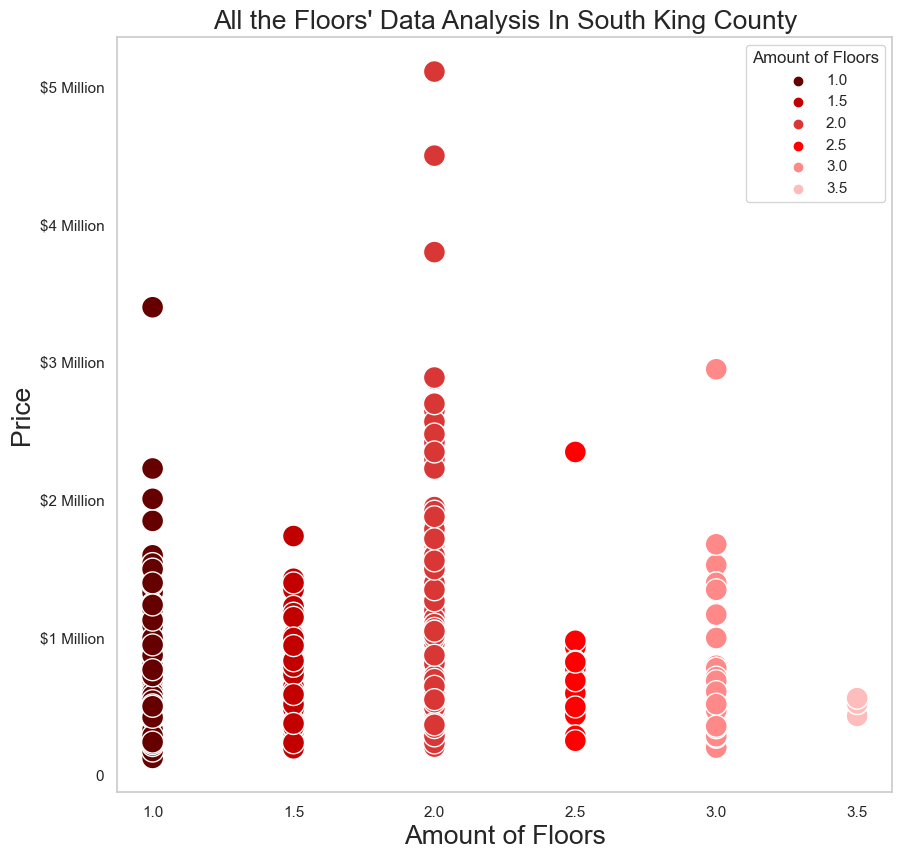

In [261]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#660000','#C30000','#D93636','#FE0000','#FF8888','#FFBCBC']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors', palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','0','$1 Million','$2 Million','$3 Million','$4 Million',
                         '$5 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [262]:
train_df, test_df = train_test_split(regressiondata3, test_size=0.10, shuffle=False)

In [263]:
X_train, y_train = train_df[['Amount_of_Floors']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Floors']], test_df[['Price']]

In [264]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [265]:
Quantile_regression2 = pd.DataFrame({'Amount_of_Floors': X_test.reset_index()['Amount_of_Floors'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [266]:
Quantile_regression2

,Amount_of_Floors,0.1,0.5,0.9,Price
0,1.5,349984.336974,565998.406316,8.268012e+05,805000.0
1,1.5,349984.336974,565998.406316,8.268012e+05,325000.0
2,1.5,349984.336974,565998.406316,8.268012e+05,401000.0
3,1.5,349984.336974,565998.406316,8.268012e+05,531000.0
4,1.5,349984.336974,565998.406316,8.268012e+05,425000.0
...,...,...,...,...,...
379,2.5,401998.076839,634996.573580,1.149993e+06,255000.0
380,3.5,401998.076839,634996.573580,1.149993e+06,435000.0
381,3.5,401998.076839,634996.573580,1.149993e+06,525000.0
382,3.5,401998.076839,634996.573580,1.149993e+06,525000.0


In [267]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Floors':[1.0,1.5,2.0,2.5,3.0,3.5],
    '0.1':[349984.336974,349984.336974,349984.336974,401998.076839,401998.076839,401998.076839],
'0.5':[565998.406316,565998.406316,565998.406316,634996.573580,634996.573580,634996.573580],
'0.9':[8.268012e+05,8.268012e+05,8.268012e+05,1.149993e+06,1.149993e+06,1.149993e+06]})
Quantileregression_updated

,Amount_of_Floors,0.1,0.5,0.9
0,1.0,349984.336974,565998.406316,826801.2
1,1.5,349984.336974,565998.406316,826801.2
2,2.0,349984.336974,565998.406316,826801.2
3,2.5,401998.076839,634996.573580,1149993.0
4,3.0,401998.076839,634996.573580,1149993.0
5,3.5,401998.076839,634996.573580,1149993.0


In [268]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Floors'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Floors,Percentile,value
0,1.0,0.1,3.499843e+05
1,1.5,0.1,3.499843e+05
2,2.0,0.1,3.499843e+05
3,2.5,0.1,4.019981e+05
4,3.0,0.1,4.019981e+05
5,3.5,0.1,4.019981e+05
6,1.0,0.5,5.659984e+05
7,1.5,0.5,5.659984e+05
8,2.0,0.5,5.659984e+05
9,2.5,0.5,6.349966e+05


<ipython-input-269-278a638b7205>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000',


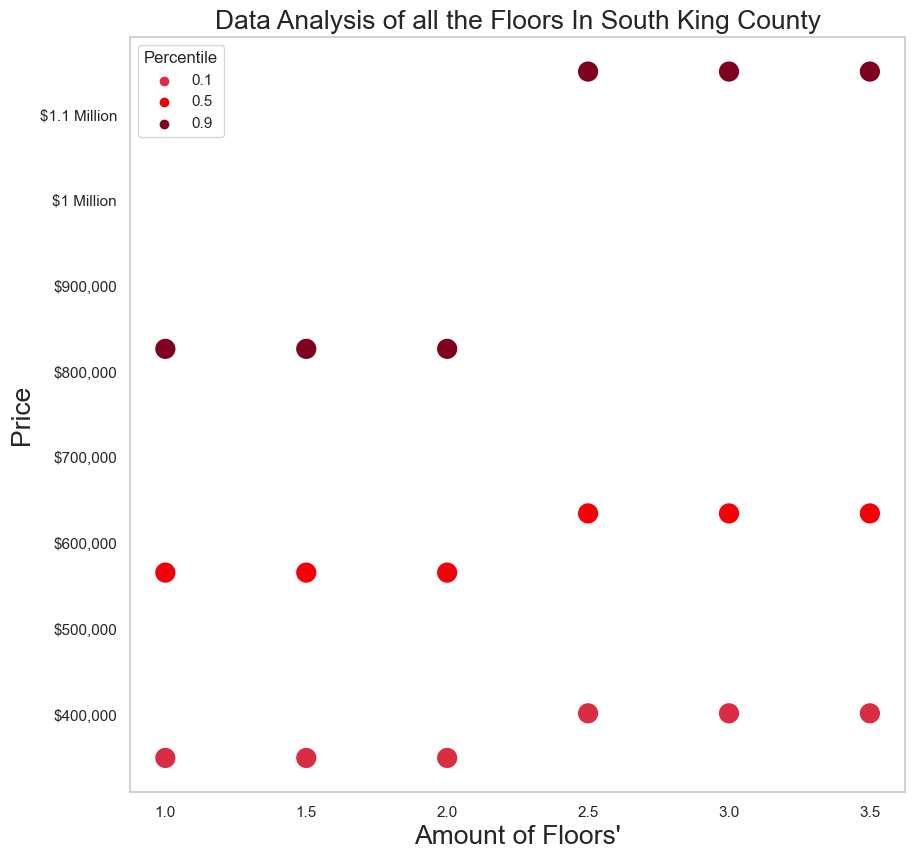

In [269]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Floors",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Floors In South King County',size=19)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000',
                    '$1 Million','$1.1 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Floors'")
plt.gcf().set_size_inches((10,10))

<ipython-input-270-cba544ff7a00>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000',


[Text(0, 300000.0, '0'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1100000.0, '$1.1 Million'),
 Text(0, 1200000.0, '')]

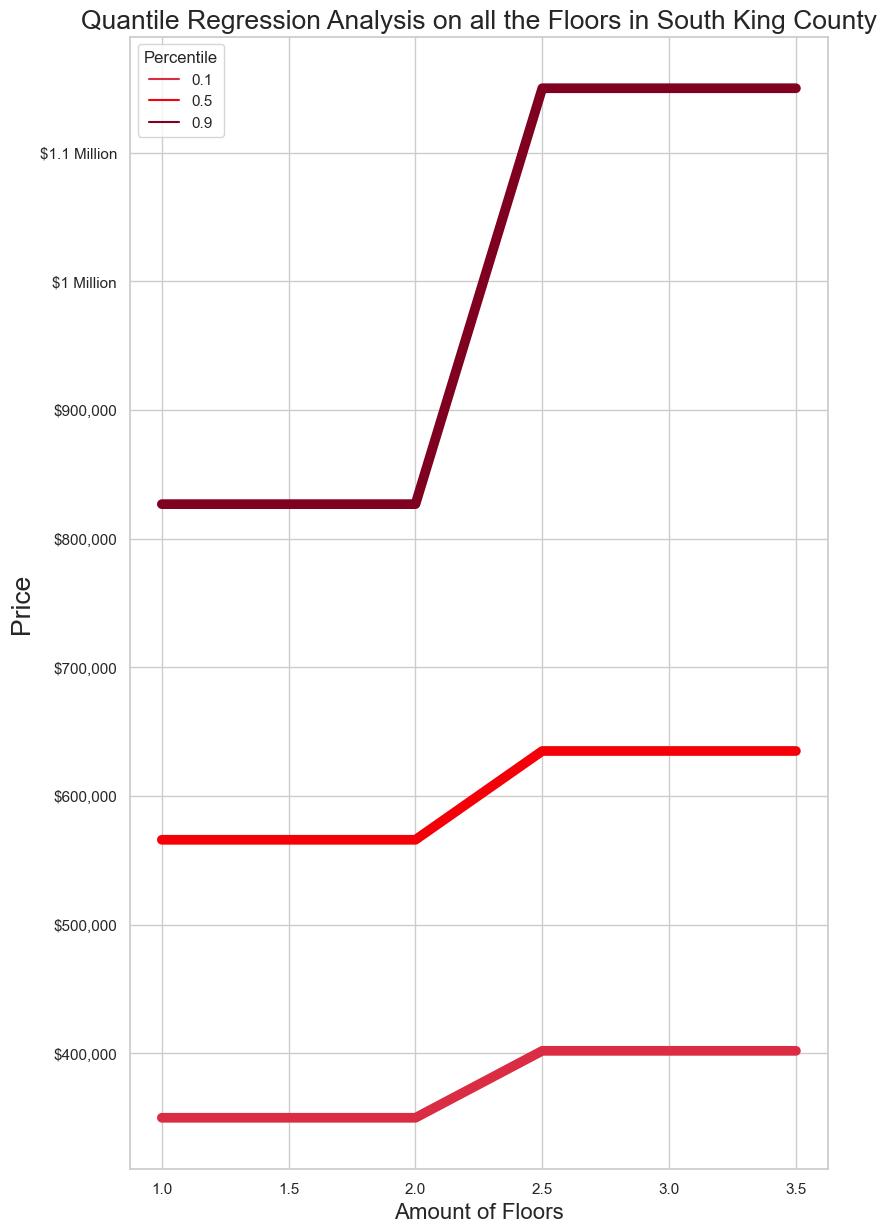

In [270]:
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Floors",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Floors in South King County',size=19)
plt.xlabel("Amount of Floors", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000','$900,000',
                    '$1 Million','$1.1 Million'])

In [271]:
(Quantile_regression2['Price'] > Quantile_regression2['0.1']).value_counts()

True     269
False    115
dtype: int64

In [272]:
i = 0
y= 0
x = []
while i < 269:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 115:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

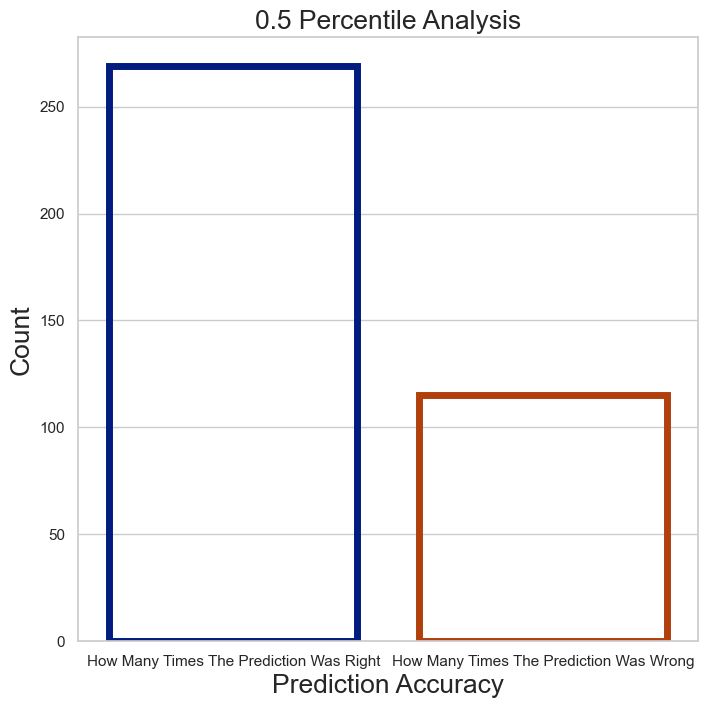

In [273]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [274]:
(Quantile_regression2['Price'] > Quantile_regression2['0.5']).value_counts()

False    306
True      78
dtype: int64

In [275]:
i = 0
y= 0
x = []
while i < 306:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 78:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

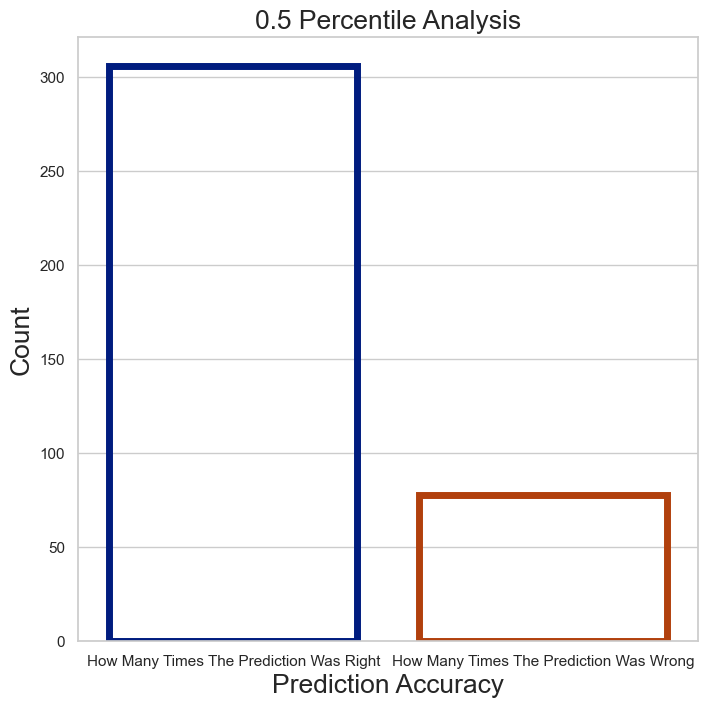

In [276]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [277]:
(Quantile_regression2['Price'] > Quantile_regression2['0.9']).value_counts()

False    369
True      15
dtype: int64

In [278]:
i = 0
y= 0
x = []
while i < 369:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 15:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

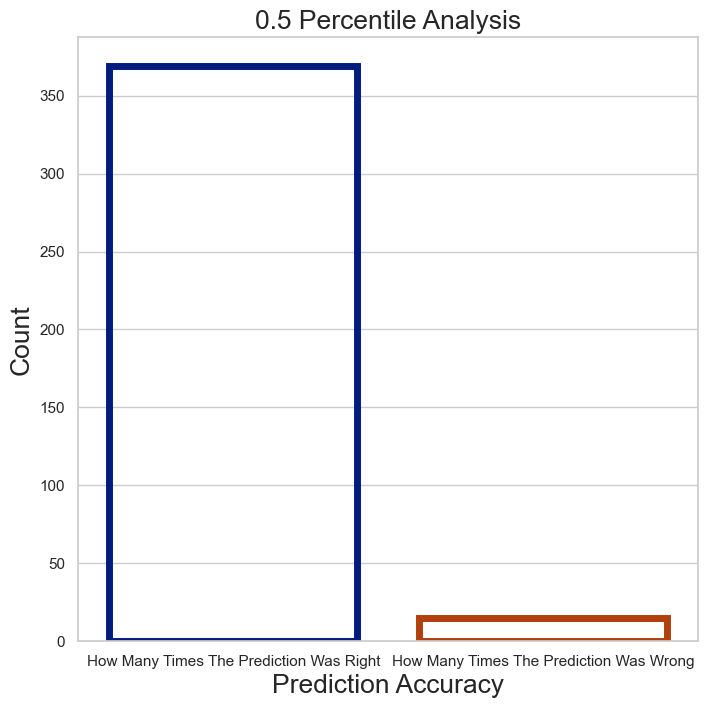

In [279]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [280]:
Predictions2 = []
for i in regressiondata3.Amount_of_Floors:
    if i == 1.0:Predictions2.append('Between: $349,984 - $826,801') 
    if i == 1.5:Predictions2.append('Between: $349,984 - $826,801') 
    if i == 2.0:Predictions2.append('Between: $349,984 - $826,801')
    if i == 2.5:Predictions2.append('Between: $401,998 - $1,149,993') 
    if i == 3.0: Predictions2.append('Between: $401,998 - $1,149,993')
    if i == 3.5: Predictions2.append('Between: $401,998 - $1,149,993')
len(Predictions2)

3831

In [281]:
price = []
for i in regressiondata3.Price:
    price.append("${:,.0f}".format(i))

In [282]:
Prediction2 = pd.DataFrame({'Amount of Floors':regressiondata3.Amount_of_Floors,
                           'Prediction':Predictions2,'Actual Price':price})
Prediction2

,Amount of Floors,Prediction,Actual Price
0,1.0,"Between: $349,984 - $826,801","$180,000"
1,1.0,"Between: $349,984 - $826,801","$468,000"
2,1.0,"Between: $349,984 - $826,801","$385,000"
3,1.0,"Between: $349,984 - $826,801","$438,000"
4,1.0,"Between: $349,984 - $826,801","$450,000"
...,...,...,...
3826,2.5,"Between: $401,998 - $1,149,993","$255,000"
3827,3.5,"Between: $401,998 - $1,149,993","$435,000"
3828,3.5,"Between: $401,998 - $1,149,993","$525,000"
3829,3.5,"Between: $401,998 - $1,149,993","$525,000"


In [283]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()

    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)

    years_built_northking = []
    for i in years_built_index:
        if locations[i] == 98133 : years_built_northking.append(i)
        elif locations[i] == 98155 : years_built_northking.append(i)
        elif locations[i] == 98177 : years_built_northking.append(i)
        elif locations[i] == 98115 : years_built_northking.append(i)
        elif locations[i] == 98107 : years_built_northking.append(i)
        elif locations[i] == 98133 : years_built_northking.append(i)
        elif locations[i] == 98033 : years_built_northking.append(i)
        elif locations[i] == 98133 : years_built_northking.append(i)
        elif locations[i] == 98103 : years_built_northking.append(i)
        elif locations[i] == 98072 : years_built_northking.append(i)
        elif locations[i] == 98028 : years_built_northking.append(i)
        elif locations[i] == 98072 : years_built_northking.append(i)
        elif locations[i] == 98077 : years_built_northking.append(i)
        elif locations[i] == 98155 : years_built_northking.append(i)
        elif locations[i] == 98133 : years_built_northking.append(i)
        elif locations[i] == 98077 : years_built_northking.append(i)
        elif locations[i] == 98177 : years_built_northking.append(i)
        elif locations[i] == 98072 : years_built_northking.append(i)

    price = house_info["Price"].tolist()

    price_northking = []
    for i in years_built_northking:price_northking.append(price[i])
    return(price_northking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_northking = []
for i in no_of_Year:
    price_Year_northking.append(PRICE_YEARS_BUILT(i))
price_Year_northking = sum(price_Year_northking, [])
len(price_Year_northking)

3831

In [284]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()

    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)

    for i in years_index:
        if locations[i] == 98133 :   X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98155 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98177 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98115 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98107 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98033 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98103 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98072:  X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98028 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98072 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98077 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98155 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98077 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98177 : X_value.append(AMOUNT_YEARS)
        elif locations[i] == 98072 : X_value.append(AMOUNT_YEARS)

    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_northking = []
for i in no_of_years:
    amount_years_northking.append(AMOUNT_YEARS_BUILT(i))
amount_years_northking= sum(amount_years_northking, [])
len(amount_years_northking)

3831

In [285]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_northking,
                                'Price':price_Year_northking})
regressiondata4

,Year_Built,Price
0,2014,549000.0
1,2014,519950.0
2,2014,770000.0
3,2014,880000.0
4,2014,1130000.0
...,...,...
3826,1934,550000.0
3827,1934,345950.0
3828,1934,338000.0
3829,1934,395000.0


In [286]:
year = regressiondata4['Year_Built'].value_counts()
year

2008    94
1947    91
2007    88
1950    85
1948    84
        ..
1901     6
1934     5
1933     4
1902     4
1936     4
Name: Year_Built, Length: 116, dtype: int64

In [287]:
reg1,year1 = [],[]
for i,x in enumerate(amount_years_northking):
    if x == 1900:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1901:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1902:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1903:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1904:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1905:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1906:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1907:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1908:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1909:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1910:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1911:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1912:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1913:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1914:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1915:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1916:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1917:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1918:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1919:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1920:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1921:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1922:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1923:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1924:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1925:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1926:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1927:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1928:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1929:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1930:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1931:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1932:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1933:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if i == 1934:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1935:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1936:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1937:
        reg1.append(price_Year_northking[i])
        year1.append(x)
reg1.remove(579000.0)
year1.remove(1961) 

In [288]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
#for i,x in enumerate(regressiondata44.Year_Built):print(i,x,reg1[i])
x= regressiondata44.Year_Built.value_counts()
len(x)

37

In [289]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_northking):
    if x == 1938:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1939:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1940:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1941:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1942:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1943:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1944:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1945:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1946:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1947:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1948:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1949:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1950:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1951:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1952:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1953:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1954:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1955:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1956:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1957:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1958:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1959:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1960:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1961:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1962:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1963:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1964:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1965:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1966:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1967:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1968:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1969:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1970:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1971:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if i == 1972:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1973:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1974:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1975:
        reg1.append(price_Year_northking[i])
        year1.append(x)

In [290]:
regressiondata45 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata45

,Year_Built,Price
0,1968,452000.0
1,1968,400000.0
2,1968,605000.0
3,1968,389000.0
4,1968,442500.0
...,...,...
1584,1938,404500.0
1585,1938,397500.0
1586,1938,495000.0
1587,1938,580000.0


In [291]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_northking):
    if x == 1976:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1977:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1978:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1979:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1980:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1981:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1982:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1983:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1984:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1985:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1986:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1987:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1988:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1989:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1990:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1991:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1992:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1993:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1994:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1995:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1996:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1997:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1998:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 1999:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2001:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2002:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2003:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2004:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2005:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2006:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2007:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2008:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2009:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2010:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if i == 2011:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2012:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2013:
        reg1.append(price_Year_northking[i])
        year1.append(x)
    if x == 2014:
        reg1.append(price_Year_northking[i])
        year1.append(x)
reg1.remove(326100.0)
year1.remove(1942) 

In [292]:
regressiondata46 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata46
x= regressiondata46.Year_Built.value_counts()
len(x)
#for i,x in enumerate(regressiondata46.Year_Built):if x == 1942:print(i,x,reg1[i])

37

In [293]:
flatui1 = ['#F1895F','#EA926F','#F18356','#F47644','#E26E40',
           '#E18762','#E88259','#DF7449','#D86B3F','#F94C07',
          '#F04B09','#E54809','#E2541B','#D3521F','#EB5B21',
           
          '#EEA88C','#F2B59D','#EBB9A5','#EEC7B7','#F4D0C1',
           '#F1D7CC','#F1E6E1','#F7EEEB','#F1C8B7','#DFB09E',
        
           '#C04514','#B24F27','#973D19','#863211','#7D2907',
           '#723219','#714431','#5C3B2D','#50392F','#3C251C','#4A372F','#2E211C']

In [294]:
flatui2 = ['#FC0606','#E80303','#DA1818','#E43030','#D23030',
           '#BC3434','#A92E2E','#9A2222','#8A1414','#B71A1A',
          '#B32323','#BE1212','#E86060','#DD4C4C','#E33A3A',
           
          '#F5DEDE','#F1E3E3','#F9E6E6','#F9EEEE','#F6E0E0',
           '#F9DBDB','#EACDCD','#9D2121','#961818','#8A0000',
        
           '#840303','#7E0E0E','#721212','#600F0F','#571414',
           '#470F0F','#431818','#3B1919','#330E0E','#420808',
           'black','black']

In [295]:
flatui3 = ['#EC3A74','#D13769','#EB3D75','#DB386D','#CC2C60',
           '#D51050','#E9044E','#F70554','#F5135D','#F32A6B',
          '#F03974','#EE5385','#F36B97','#F27FA4','#EC8DAC',
           
          '#F5C2D3', '#EFC9D7', '#F1D0DC','#F7EEF2', '#F1ECEE','#EFDEE4',
          '#EFDEE4','#ECA5BE','#F0B8CC',   '#7E0531'  ,'#850835','#721335',
        
           '#6C203C','#82032C','#680726','#6C1833','#870731',
           '#6B0A29','#6C1934','#702F44','#701D38','#730F30']

<ipython-input-296-0dd67d56e3c0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
<ipython-input-296-0dd67d56e3c0>:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-296-0dd67d56e3c0>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
<ipython-input-296-0dd67d56e3c0>:37: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)
<ipython-input-296-0dd67d56e3c0>:54: UserWarning: FixedFormatter should only be used together with Fixed

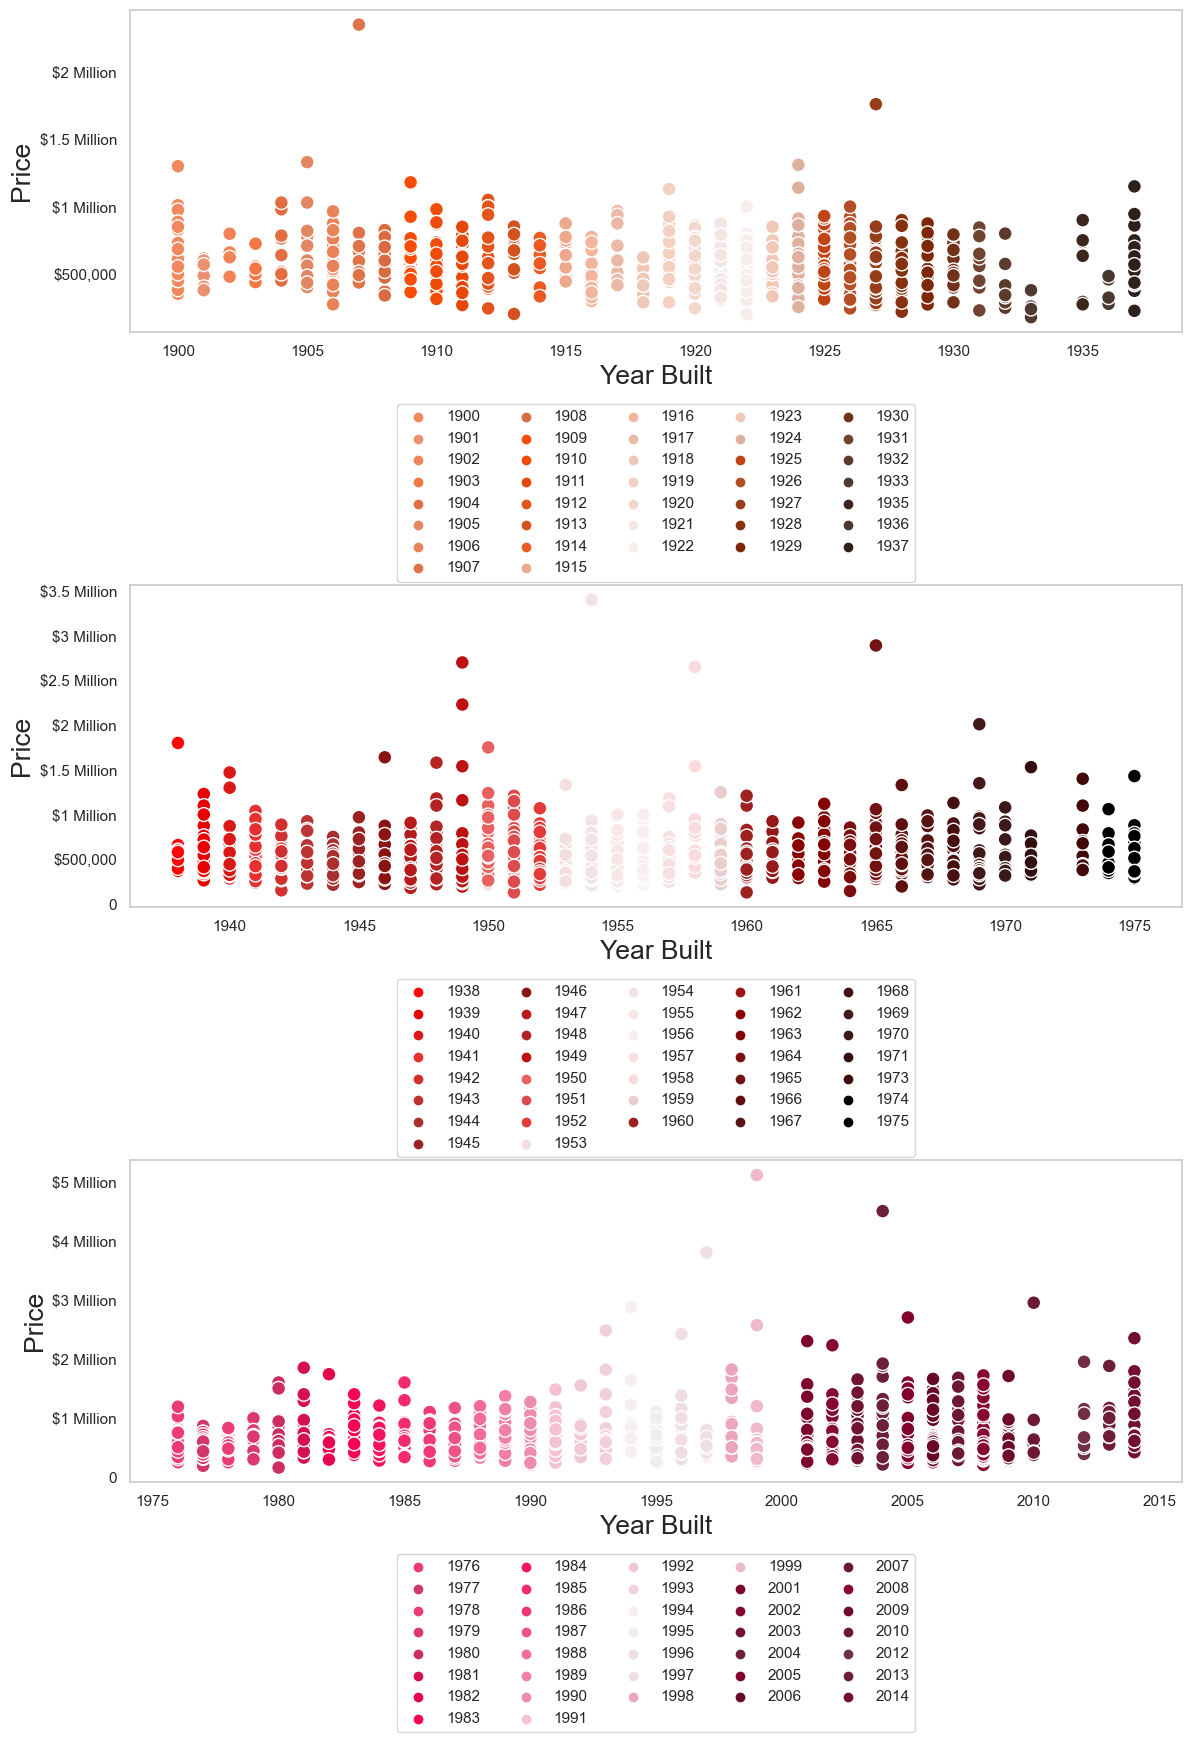

In [296]:
plt.subplot(3,1,1) #35 years in tottal
x = regressiondata44['Year_Built']
y = regressiondata44['Price']
data=regressiondata44
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata44, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui1)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In North King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks()

plt.subplot(3,1,2)
x = regressiondata45['Year_Built']
y = regressiondata45['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata45, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui2)
plt.grid(linestyle='-', linewidth=0.2)

plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million',
                    '$3 Million','$3.5 Million',])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 

plt.subplot(3,1,3)
sns.set(style="whitegrid")
x = regressiondata46['Year_Built']
y = regressiondata46['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata46, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui3)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(1)
plt.show()



In [297]:
train_df, test_df = train_test_split(regressiondata4, test_size=0.90, shuffle=False)

In [298]:
X_train, y_train = train_df[['Year_Built']], train_df[['Price']]
X_test, y_test = test_df[['Year_Built']], test_df[['Price']]

In [299]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [300]:
Quantile_regression3 = pd.DataFrame({'Year_Built': X_test.reset_index()['Year_Built'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [301]:
Quantile_regression3

,Year_Built,0.1,0.5,0.9,Price
0,2007,346000.129133,500001.062456,8.719086e+05,356000.0
1,2007,346000.129133,500001.062456,8.719086e+05,379950.0
2,2007,346000.129133,500001.062456,8.719086e+05,515000.0
3,2007,346000.129133,500001.062456,8.719086e+05,963000.0
4,2007,346000.129133,500001.062456,8.719086e+05,770000.0
...,...,...,...,...,...
3443,1934,347000.087313,522500.464824,1.158001e+06,550000.0
3444,1934,347000.087313,522500.464824,1.158001e+06,345950.0
3445,1934,347000.087313,522500.464824,1.158001e+06,338000.0
3446,1934,347000.087313,522500.464824,1.158001e+06,395000.0


In [322]:
melted_data = pd.melt(Quantile_regression3, id_vars=['Year_Built'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(10344,13792))
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Year_Built,Percentile,value
0,2007,0.1,3.460001e+05
1,2007,0.1,3.460001e+05
2,2007,0.1,3.460001e+05
3,2007,0.1,3.460001e+05
4,2007,0.1,3.460001e+05
...,...,...,...
10339,1934,0.9,1.158001e+06
10340,1934,0.9,1.158001e+06
10341,1934,0.9,1.158001e+06
10342,1934,0.9,1.158001e+06


In [333]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1900,1901,1902,1903,1904,1905,1906,1907,1908,
                                                         1909,
                                                        1910,1911,1912,1913,1914,1915,1916,1917,1918,
                                                         1919,
                                                        1920,1921,1922,1923,1924,1925,1926,1927,1928,
                                                         1929,
                                                        1930,1931,1932,1933,1934,1935,1935,1936,1937],
'0.1':[347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313],
'0.5':[522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824], 
'0.9':[1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06]})
Quantileregression_updated

,Year_Built,0.1,0.5,0.9
0,1900,347000.087313,522500.464824,1158001.0
1,1901,347000.087313,522500.464824,1158001.0
2,1902,347000.087313,522500.464824,1158001.0
3,1903,347000.087313,522500.464824,1158001.0
4,1904,347000.087313,522500.464824,1158001.0
5,1905,347000.087313,522500.464824,1158001.0
6,1906,347000.087313,522500.464824,1158001.0
7,1907,347000.087313,522500.464824,1158001.0
8,1908,347000.087313,522500.464824,1158001.0
9,1909,347000.087313,522500.464824,1158001.0


In [334]:
melted_data1 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data1 = melted_data1.rename(columns={'variable': 'Percentile'})
melted_data1

,Year_Built,Percentile,value
0,1900,0.1,3.470001e+05
1,1901,0.1,3.470001e+05
2,1902,0.1,3.470001e+05
3,1903,0.1,3.470001e+05
4,1904,0.1,3.470001e+05
...,...,...,...
112,1934,0.9,1.158001e+06
113,1935,0.9,1.158001e+06
114,1935,0.9,1.158001e+06
115,1936,0.9,1.158001e+06


In [336]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1938,1939,1940,1941,1942,1943,
                                                        1944,1945,1946,1947,1948,1949,
                                                        1950,1951,1952,1953,1954,1955,
                                                        1956,1957,1958,1959,1960,1961,
                                                        1962,1963,1964,1965,1966,1967,
                                                        1968,1969,1970,1971,1972,1973,
                                                        1974,1975],
'0.1':[347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313],
'0.5':[522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824], 
'0.9':[1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06]})
Quantileregression_updated

,Year_Built,0.1,0.5,0.9
0,1938,347000.087313,522500.464824,1158001.0
1,1939,347000.087313,522500.464824,1158001.0
2,1940,347000.087313,522500.464824,1158001.0
3,1941,347000.087313,522500.464824,1158001.0
4,1942,347000.087313,522500.464824,1158001.0
5,1943,347000.087313,522500.464824,1158001.0
6,1944,347000.087313,522500.464824,1158001.0
7,1945,347000.087313,522500.464824,1158001.0
8,1946,347000.087313,522500.464824,1158001.0
9,1947,347000.087313,522500.464824,1158001.0


In [337]:
melted_data2 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data2 = melted_data2.rename(columns={'variable': 'Percentile'})
melted_data2

,Year_Built,Percentile,value
0,1938,0.1,3.470001e+05
1,1939,0.1,3.470001e+05
2,1940,0.1,3.470001e+05
3,1941,0.1,3.470001e+05
4,1942,0.1,3.470001e+05
...,...,...,...
109,1971,0.9,1.158001e+06
110,1972,0.9,1.158001e+06
111,1973,0.9,1.158001e+06
112,1974,0.9,1.158001e+06


In [338]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1976,1977,1978,1979,1980,1981,
                                                        1982,1983,1984,1985,1986,1987,
                                                        1988,1989,1990,1991,1992,1993,
                                                        1994,1995,1996,1997,1998,1999,
                                                        2000,2001,
                                                         
                                                        2002,2003,2004,2005,2006,2007,
                                                        2008,2009,2010,2011,2012,2013,
                                                        2014,2015],
                                           
'0.1':[347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,347000.087313,
      347000.087313,347000.087313, 
      346000.129133,346000.129133,346000.129133,346000.129133,346000.129133,346000.129133,
      346000.129133,346000.129133,346000.129133,346000.129133,346000.129133,346000.129133,
      346000.129133,346000.129133],
                                           
'0.5':[522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,522500.464824,
      522500.464824,522500.464824,
      500001.062456,500001.062456,500001.062456,500001.062456,500001.062456,500001.062456,
      500001.062456,500001.062456,500001.062456,500001.062456,500001.062456,500001.062456,
      500001.062456,500001.062456], 

'0.9':[1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,1.158001e+06,
      1.158001e+06,1.158001e+06,
      8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,
      8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,8.719086e+05,
      8.719086e+05,8.719086e+05
    ]})
Quantileregression_updated

,Year_Built,0.1,0.5,0.9
0,1976,347000.087313,522500.464824,1158001.0
1,1977,347000.087313,522500.464824,1158001.0
2,1978,347000.087313,522500.464824,1158001.0
3,1979,347000.087313,522500.464824,1158001.0
4,1980,347000.087313,522500.464824,1158001.0
5,1981,347000.087313,522500.464824,1158001.0
6,1982,347000.087313,522500.464824,1158001.0
7,1983,347000.087313,522500.464824,1158001.0
8,1984,347000.087313,522500.464824,1158001.0
9,1985,347000.087313,522500.464824,1158001.0


In [339]:
melted_data3 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data3 = melted_data3.rename(columns={'variable': 'Percentile'})
melted_data3

,Year_Built,Percentile,value
0,1976,0.1,347000.087313
1,1977,0.1,347000.087313
2,1978,0.1,347000.087313
3,1979,0.1,347000.087313
4,1980,0.1,347000.087313
...,...,...,...
115,2011,0.9,871908.600000
116,2012,0.9,871908.600000
117,2013,0.9,871908.600000
118,2014,0.9,871908.600000


<ipython-input-341-b5d638d2ecac>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
<ipython-input-341-b5d638d2ecac>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
<ipython-input-341-b5d638d2ecac>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',


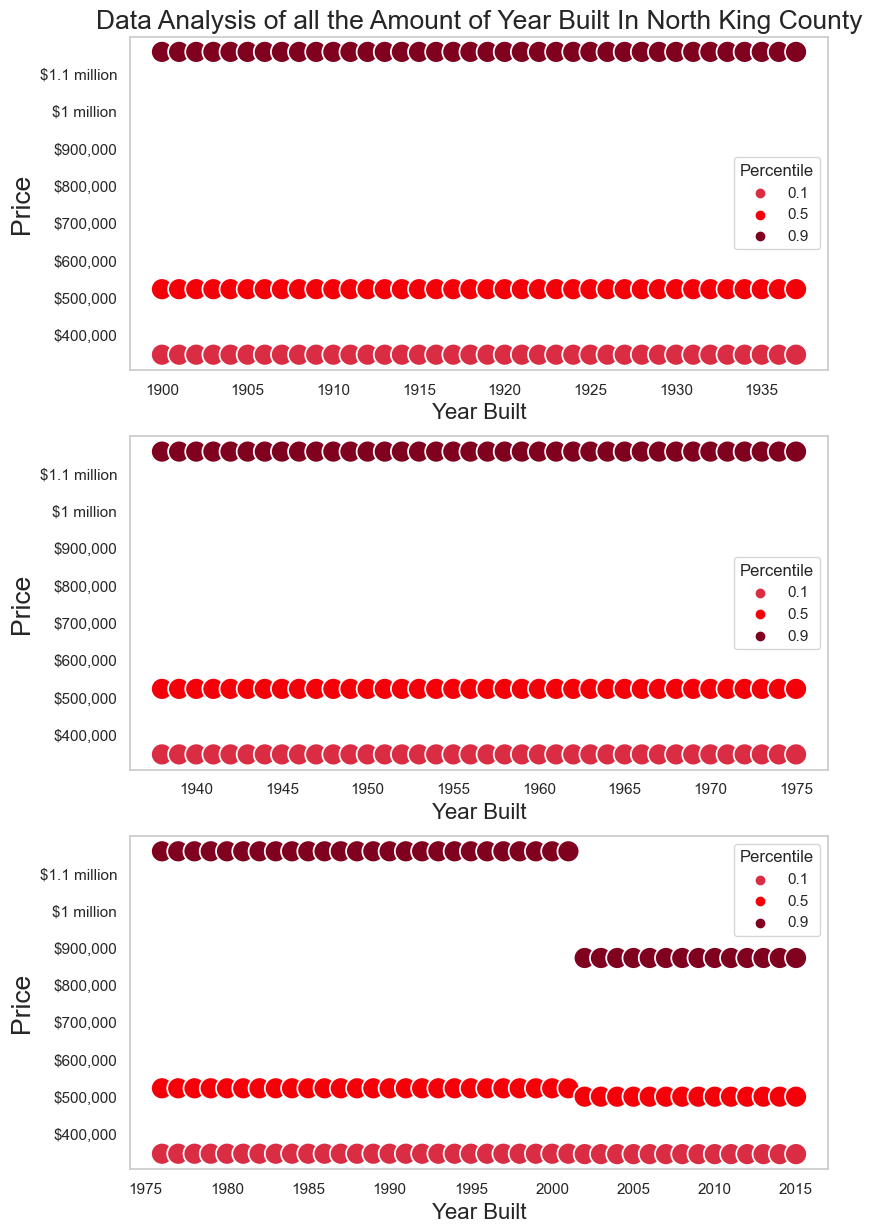

In [341]:
plt.subplot(3,1,1)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data1, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Year Built In North King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,2)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data2, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,3)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data3, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)

<ipython-input-343-3bedce034a7d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
<ipython-input-343-3bedce034a7d>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
<ipython-input-343-3bedce034a7d>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',


[Text(0, 300000.0, '0'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 million'),
 Text(0, 1100000.0, '$1.1 million'),
 Text(0, 1200000.0, '')]

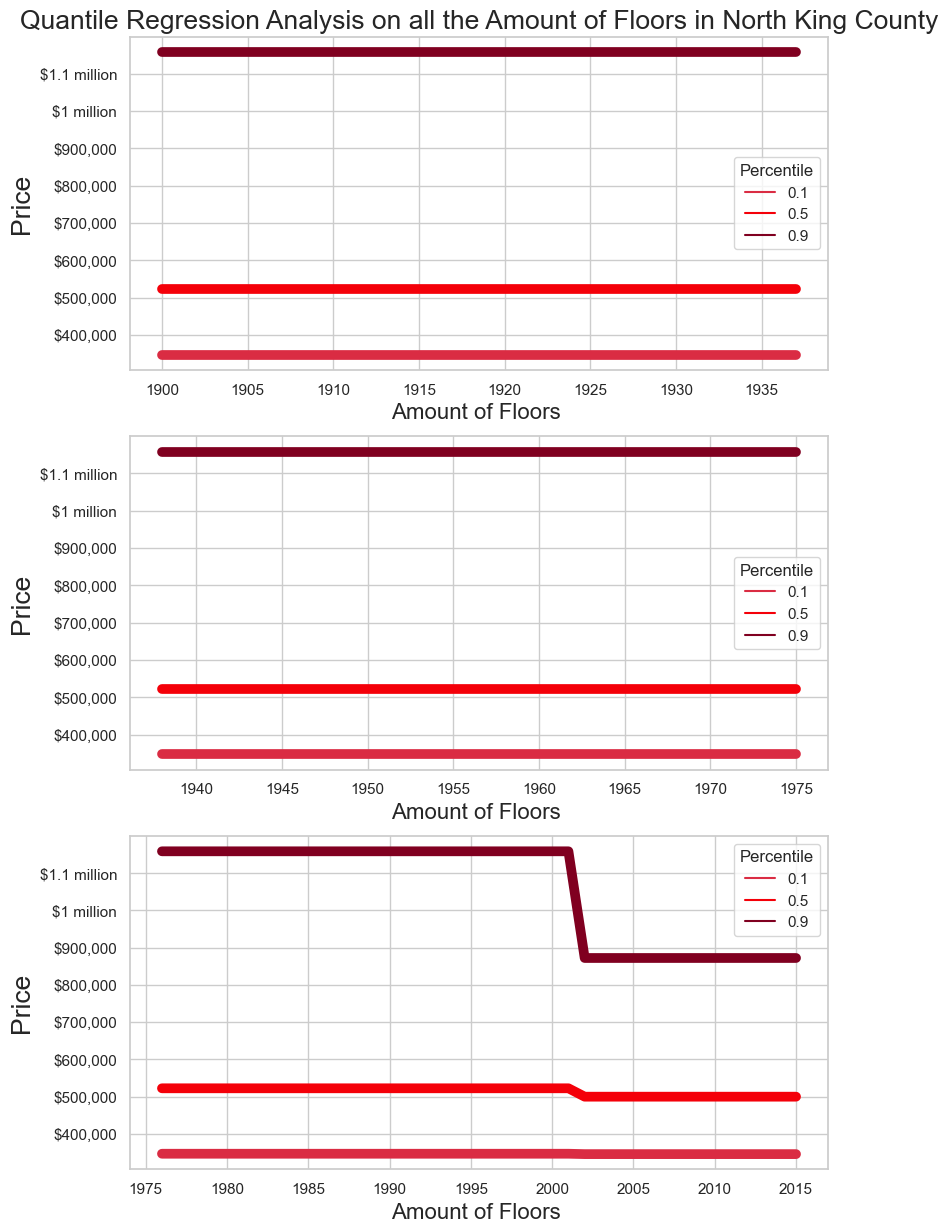

In [343]:
plt.subplot(3,1,1)
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data1, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15) 
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Amount of Floors in North King County',size=19)
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])


plt.subplot(3,1,2)
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot(  data=melted_data2, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)  
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])


plt.subplot(3,1,3)
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data3, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000','$800,000', '$900,000',
                    '$1 million','$1.1 million'])

In [344]:
(Quantile_regression3['Price'] > Quantile_regression3['0.1']).value_counts()

True     2948
False     500
dtype: int64

In [347]:
i = 0
y= 0
x = []
while i < 2948:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 500:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [345]:
(Quantile_regression3['Price'] > Quantile_regression3['0.5']).value_counts()

False    1895
True     1553
dtype: int64

In [348]:
i = 0
y= 0
x = []
while i < 1895:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1553:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [346]:
(Quantile_regression3['Price'] > Quantile_regression3['0.9']).value_counts()

False    3336
True      112
dtype: int64

In [349]:
i = 0
y= 0
x = []
while i < 3336:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 112:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

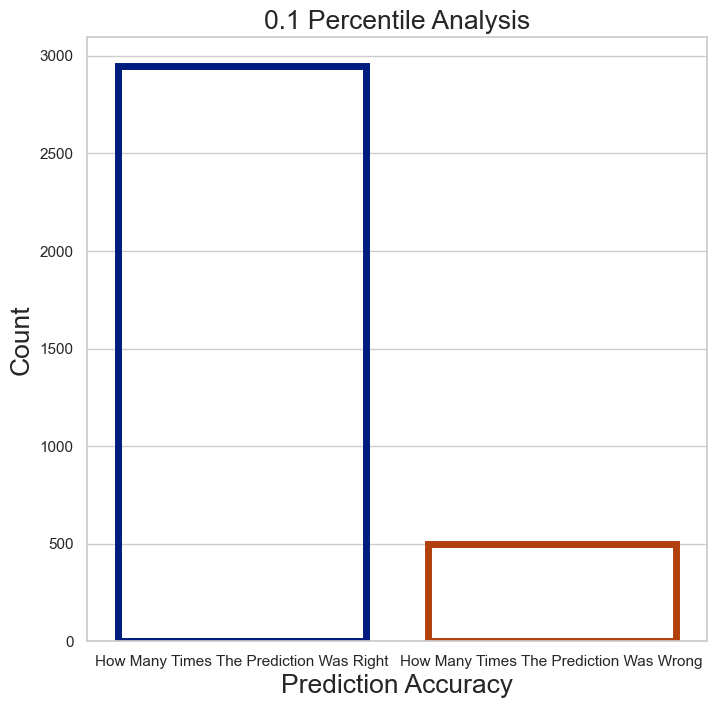

In [350]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

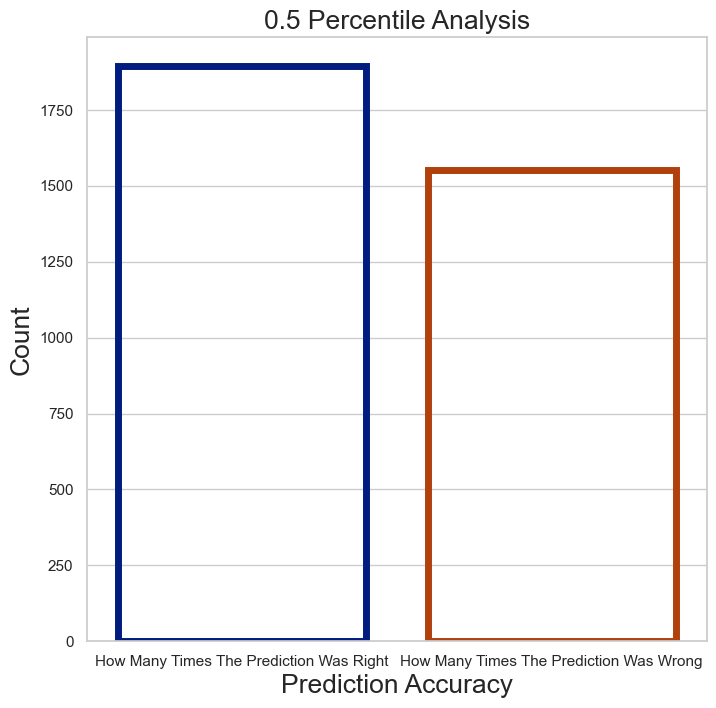

In [351]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

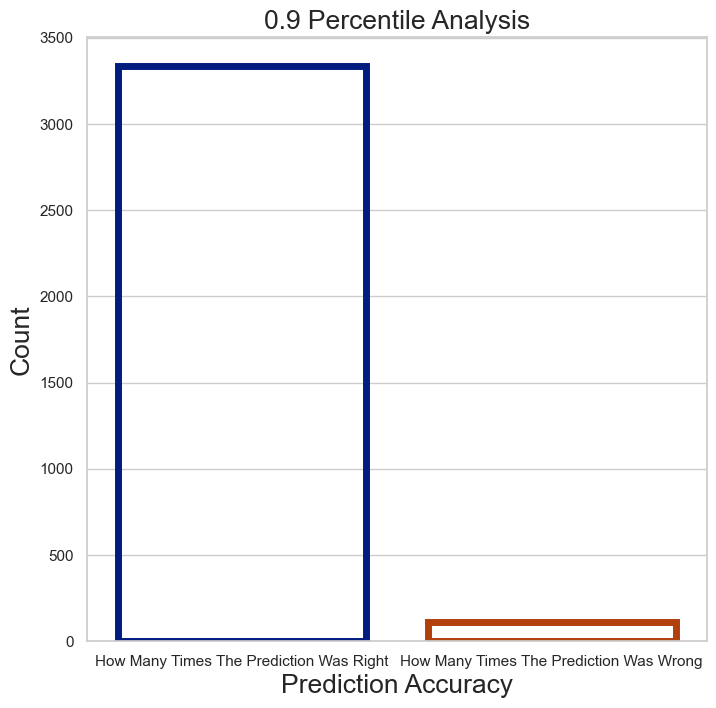

In [352]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [369]:
Predictions3 = []
for i in regressiondata4.Year_Built:
    if i == 1900:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1901:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1902:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1903:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1904:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1905:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1906:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1907:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1908:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1909:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1910:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1911:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1912:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1913:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1914:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1915:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1916:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1917:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1918:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1919:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1920:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1921:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1922:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1923:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1924:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1925:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1926:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1927:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1928:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1929:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1930:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1931:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1932:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1933:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1934:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1935:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1936:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1937:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1938:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1939:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1940:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1941:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1942:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1943:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1944:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1945:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1946:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1947:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1948:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1949:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1950:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1951:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1952:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1953:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1954:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1955:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1956:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1957:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1958:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1959:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1960:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1961:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1962:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1963:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1964:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1965:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1966:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1967:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1968:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1969:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1970:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1971:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1972:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1973:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1974:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1975:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1976:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1977:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1978:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1979:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1980:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1981:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1982:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1983:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1984:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1985:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1986:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1987:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1988:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1989:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1990:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1991:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1992:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1993:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1994:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1995:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1996:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1997:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 1998:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 1999:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 2000:Predictions3.append('Between: $347,000 - $1,158,001') 
    if i == 2001:Predictions3.append('Between: $347,000 - $1,158,001')
    if i == 2002:Predictions3.append('Between: $346,000 - $871,908')
    if i == 2003:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2004:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2005:Predictions3.append('Between: $346,000- $871,908')
    if i == 2006:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2007:Predictions3.append('Between: $346,000 - $871,908')
    if i == 2008:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2009:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2010:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2011:Predictions3.append('Between: $346,000- $871,908')
    if i == 2012:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2013:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2014:Predictions3.append('Between: $346,000 - $871,908') 
    if i == 2015:Predictions3.append('Between: $346,000- $871,908')
len(Predictions3)

3831

In [370]:
price = []
for i in regressiondata4.Price:
    price.append("${:,.0f}".format(i))
len(price)

3831

In [371]:
Prediction3 = pd.DataFrame({'Year Built':regressiondata4.Year_Built,
                           'Prediction':Predictions3,'Actual Price':price})
Prediction3

,Year Built,Prediction,Actual Price
0,2014,"Between: $346,000 - $871,908","$549,000"
1,2014,"Between: $346,000 - $871,908","$519,950"
2,2014,"Between: $346,000 - $871,908","$770,000"
3,2014,"Between: $346,000 - $871,908","$880,000"
4,2014,"Between: $346,000 - $871,908","$1,130,000"
...,...,...,...
3826,1934,"Between: $347,000 - $1,158,001","$550,000"
3827,1934,"Between: $347,000 - $1,158,001","$345,950"
3828,1934,"Between: $347,000 - $1,158,001","$338,000"
3829,1934,"Between: $347,000 - $1,158,001","$395,000"


In [373]:
def YEAR_RENOVATED(YEAR):
    
    locations = house_info['Location'].tolist()

    year = house_info['Year Renoveted'].tolist()

    year_index = []
    for i,x in enumerate(year):
        if x == YEAR:year_index.append(i)

    years_northking = []
    for i in year_index:
        if locations[i] == 98133 : years_northking.append(i)
        elif locations[i] == 98155 : years_northking.append(i)
        elif locations[i] == 98177 : years_northking.append(i)
        elif locations[i] == 98115 : years_northking.append(i)
        elif locations[i] == 98107 : years_northking.append(i)
        elif locations[i] == 98133 : years_northking.append(i)
        elif locations[i] == 98033 : years_northking.append(i)
        elif locations[i] == 98133 : years_northking.append(i)
        elif locations[i] == 98103 : years_northking.append(i)
        elif locations[i] == 98072 : years_northking.append(i)
        elif locations[i] == 98028 : years_northking.append(i)
        elif locations[i] == 98072 : years_northking.append(i)
        elif locations[i] == 98077 : years_northking.append(i)
        elif locations[i] == 98155 : years_northking.append(i)
        elif locations[i] == 98133 : years_northking.append(i)
        elif locations[i] == 98077 : years_northking.append(i)
        elif locations[i] == 98177 : years_northking.append(i)
        elif locations[i] == 98072 : years_northking.append(i)
 

    price = house_info["Price"].tolist()

    price_northking = []
    for i in years_northking:price_northking.append(price[i])
    return(price_northking)

year_renovated = house_info["Year Renoveted"].value_counts().index.tolist()
yearrenov_Price_northking = []
for i in year_renovated:
    yearrenov_Price_northking.append(YEAR_RENOVATED(i))
yearrenov_Price_northking = sum(yearrenov_Price_northking, [])
len(yearrenov_Price_northking)

3133

In [372]:
def AMOUNT_YEAR_RENOVATED(AMOUNT_YEAR):
    locations = house_info['Location'].tolist()

    year_renovated = house_info["Year Renoveted"].tolist()
    X_value = []
    year_index = []
    for i,x in enumerate(year_renovated):
        if x == AMOUNT_YEAR:year_index.append(i)

    for i in year_index:
        if locations[i] == 98133 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98155 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98177 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98115 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98107 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98033 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98103 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98072: X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98028 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98072 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98077 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98155 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98133 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98077 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98177 : X_value.append(AMOUNT_YEAR)
        elif locations[i] == 98072 : X_value.append(AMOUNT_YEAR)

    return X_value
year = house_info["Year Renoveted"].value_counts().index.tolist()
year_northking = []
for i in year:
    year_northking.append(AMOUNT_YEAR_RENOVATED(i))
year_northking= sum(year_northking, [])
len(year_northking)

3133

In [397]:
regressiondata5 = pd.DataFrame({'Year_Renoveted':year_northking,
                                'Price':yearrenov_Price_northking})
regressiondata5[2988:]
re5 = regressiondata5[2988:]
regressiondata5
x = re5.Year_Renoveted.value_counts()
len(x)

49

In [426]:
flatui = ['#e5b8bc',
    
          '#f5c3c8','#fbe1e3','#f1d0d3','#f6c5c9','#f9b8be',
          
          '#fca7af','#f89ea6','#ee8e97','#ee6974','#fb717d',
          
         
          
          '#fb1529','#fb3a17','#f13512','#e04528','#e02a08',
          '#f35e6b','#e84c5a','#fc3446','#fe1b2f','#f31327',
          '#e92637','#ec2739','#d50315','#d30c1d','#d82737',
           '#fa1e4e','#ee365e','#f91b3b','#ec314c','#dd2e47',
          
          '#d80517','#cc1021','#bf1d2c','#ae2531','#a10311',
          '#99111d','#8c1923','#6c1d24','#632127','#571f24',
          
          '#3d0207','#38090d','#471115','#351114','#281214',
          '#a9898c','#926468','#714a4e',#'#6c464a','#594446',
          
          #'#d3d1d1','#adacac','#807879'#,'#5c5051',
          #'#685456','#3d3737','#7f6668'#,'#5f5354',
         ]
len(flatui)#49

49

<ipython-input-427-571ac5b88404>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])


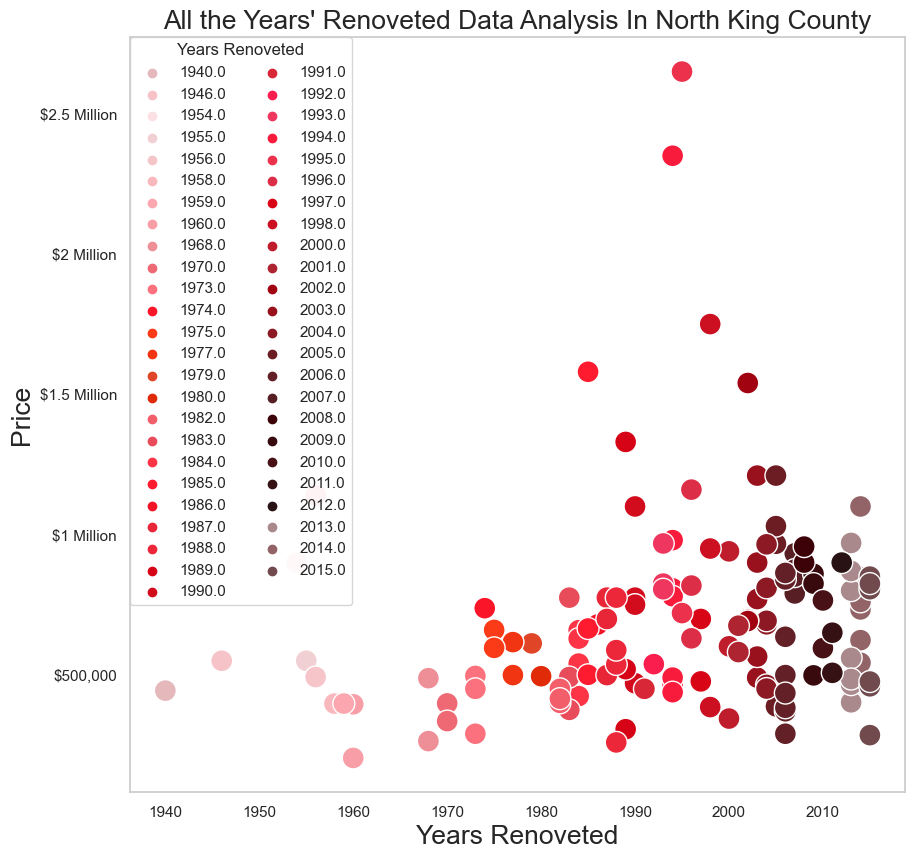

In [427]:
x = regressiondata5[2988:]['Year_Renoveted']
y = regressiondata5[2988:]['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=re5, x=x, y=y,s=250, linewidth = 1,
                    hue='Year_Renoveted',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In North King County',size=19)
plt.xlabel("Years Renoveted", size=19)
plt.legend(title='Years Renoveted')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million'])
plt.gcf().set_size_inches((10,10))
plt.legend( loc='upper left', borderaxespad=0,title="Years Renoveted",
          frameon=True, ncol=2)
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [428]:
train_df, test_df = train_test_split(regressiondata5, test_size=0.10, shuffle=False)

In [429]:
X_train, y_train = train_df[['Year_Renoveted']], train_df[['Price']]
X_test, y_test = test_df[['Year_Renoveted']], test_df[['Price']]

In [430]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [444]:
Quantile_regression4 = pd.DataFrame({'Year_Renoveted': X_test.reset_index()['Year_Renoveted'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [445]:
Quantile_regression4 = Quantile_regression4.drop(range(0,169))
Quantile_regression4

,Year_Renoveted,0.1,0.5,0.9,Price
169,2014.0,323900.15625,500000.0,850000.0,835000.0
170,2014.0,323900.15625,500000.0,850000.0,478000.0
171,2014.0,323900.15625,500000.0,850000.0,535000.0
172,2014.0,323900.15625,500000.0,850000.0,849000.0
173,2014.0,323900.15625,500000.0,850000.0,543000.0
...,...,...,...,...,...
309,1974.0,323900.15625,500000.0,850000.0,737500.0
310,1940.0,323900.15625,500000.0,850000.0,443500.0
311,1954.0,323900.15625,500000.0,850000.0,900000.0
312,1946.0,323900.15625,500000.0,850000.0,550000.0


In [454]:
melted_data5 = pd.melt(Quantile_regression4, id_vars=['Year_Renoveted'])
melted_data5 = melted_data5.drop(range(435,580))
melted_data5 = melted_data5.rename(columns={'variable': 'Percentile'})
melted_data5

,Year_Renoveted,Percentile,value
0,2014.0,0.1,323900.15625
1,2014.0,0.1,323900.15625
2,2014.0,0.1,323900.15625
3,2014.0,0.1,323900.15625
4,2014.0,0.1,323900.15625
...,...,...,...
430,1974.0,0.9,850000.00000
431,1940.0,0.9,850000.00000
432,1954.0,0.9,850000.00000
433,1946.0,0.9,850000.00000


<ipython-input-457-01390d1217dc>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000'])


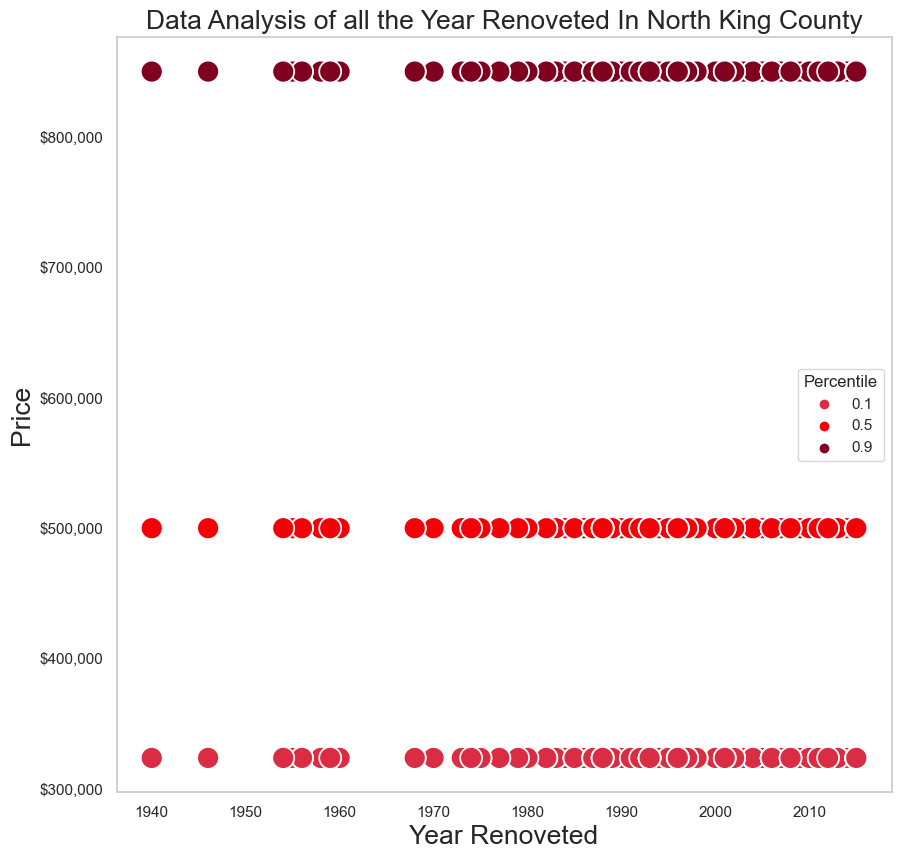

In [457]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#DA2C43","#F40009","#800020"]
ax =sns.scatterplot(data=melted_data5, x="Year_Renoveted",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Year Renoveted In North King County',size=19)
plt.xlabel("Year Renoveted'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Renoveted")
plt.gcf().set_size_inches((10,10))

<ipython-input-458-9aaf1701a480>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000'])


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '')]

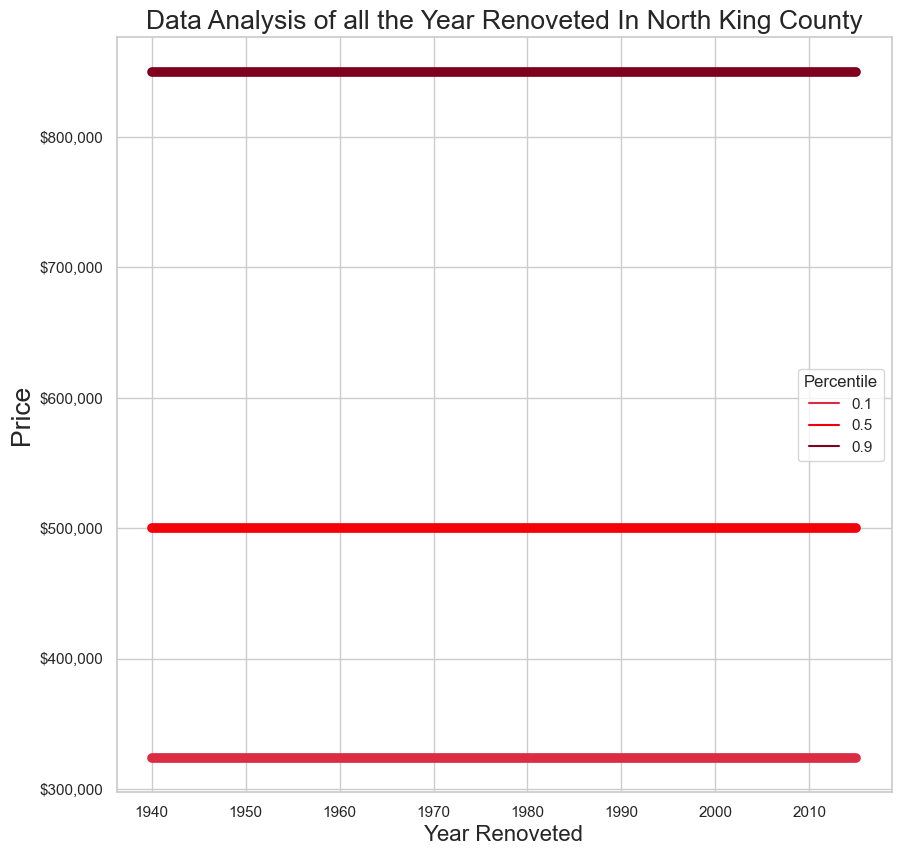

In [458]:
sns.set_style("whitegrid")
flatui = ["#DA2C43","#F40009","#800020"]
ax=sns.lineplot( data=melted_data5, x="Year_Renoveted",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Year Renoveted In North King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Year Renoveted", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000'])

In [459]:
(Quantile_regression4['Price'] > Quantile_regression4['0.1']).value_counts()

True     138
False      7
dtype: int64

In [462]:
i = 0
y= 0
x = []
while i < 138:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 7:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [460]:
(Quantile_regression4['Price'] > Quantile_regression4['0.5']).value_counts()

True     93
False    52
dtype: int64

In [463]:
i = 0
y= 0
x = []
while i < 93:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 52:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [461]:
(Quantile_regression4['Price'] > Quantile_regression4['0.9']).value_counts()

False    115
True      30
dtype: int64

In [464]:
i = 0
y= 0
x = []
while i < 115:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 30:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

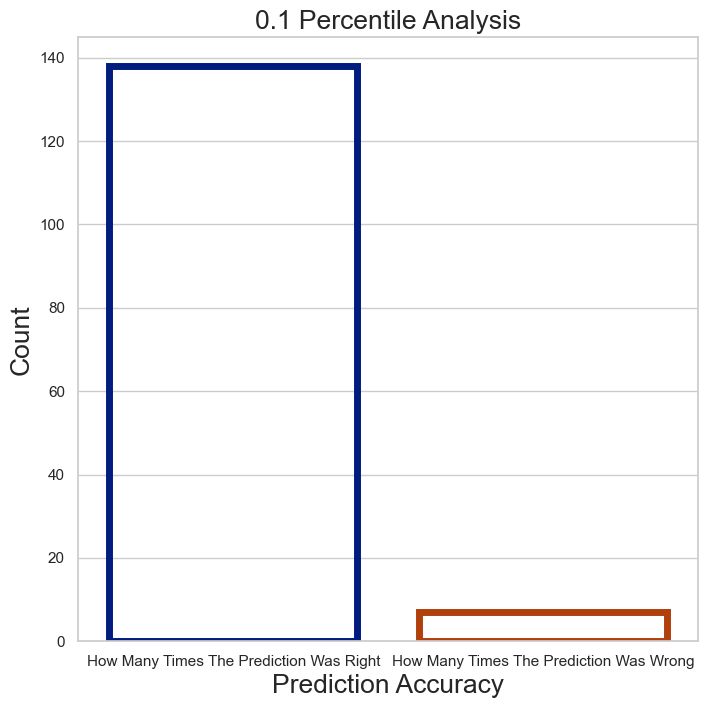

In [465]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

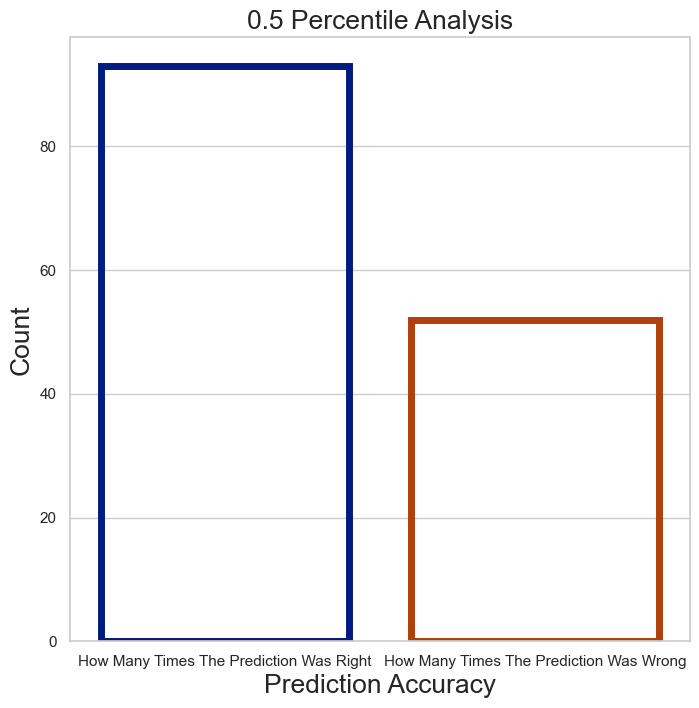

In [466]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

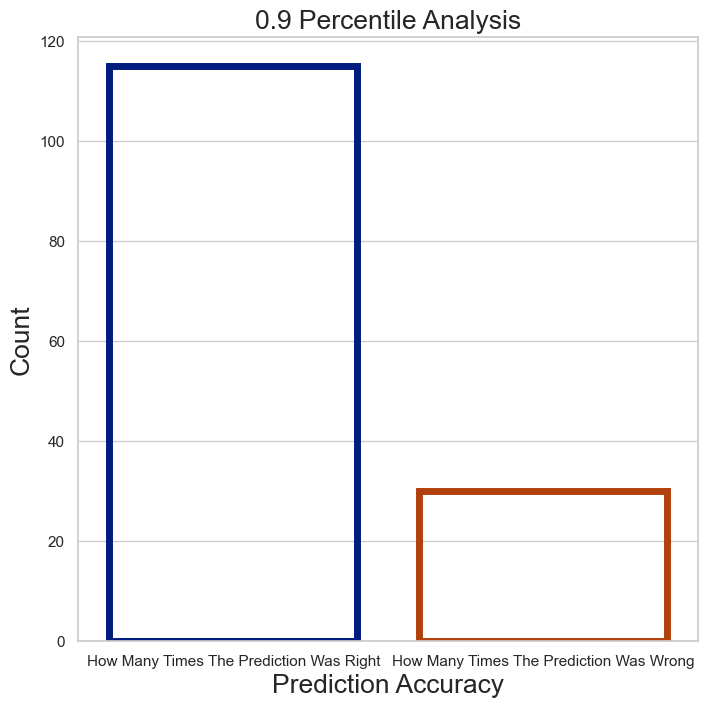

In [467]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [468]:
Predictions3 = []
for i in regressiondata5.Year_Renoveted:
    if i == 0:  Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1950:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1951:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1952:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1953:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1954:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1955:Predictions3.append('Between: $199,000 - $449,693')
    if i == 1956:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1957:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1958:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1959:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1960:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1961:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1962:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1963:Predictions3.append('Between: $199,000 - $449,693')
    if i == 1964:Predictions3.append('Between: $199,000 - $449,693')
    if i == 1965:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1966:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1967:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1968:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1969:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1970:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1971:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1972:Predictions3.append('Between: $199,000- $449,693')
    if i == 1973:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1974:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1975:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1976:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1977:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1978:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1979:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1980:Predictions3.append('Between: $199,000 - $449,693')
    if i == 1981:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1982:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1983:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1984:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1985:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1986:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1987:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1988:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1989:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1990:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1991:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1992:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1993:Predictions3.append('Between: $199,000 - $449,693')
    if i == 1994:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1995:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1996:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1997:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1998:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 1999:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2000:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2001:Predictions3.append('Between: $199,000 - $449,693')
    if i == 2002:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2003:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2004:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2005:Predictions3.append('Between: $199,000- $449,693')
    if i == 2006:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2007:Predictions3.append('Between: $199,000 - $449,693')
    if i == 2008:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2009:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2010:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2011:Predictions3.append('Between: $199,000- $449,693')
    if i == 2012:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2013:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2014:Predictions3.append('Between: $199,000 - $449,693') 
    if i == 2015:Predictions3.append('Between: $199,000- $449,693')
len(Predictions3)
len(price)

3831

In [469]:
price = []
for i in regressiondata5.Price:
    price.append("${:,.0f}".format(i))

In [470]:
Prediction4 = pd.DataFrame({'Year Renoveted':regressiondata5.Year_Renoveted,
                           'Prediction':Predictions3,'Actual Price':price})
Prediction4

ValueError: arrays must all be same length